IMPORT LIBRARIES

In [1]:
import requests
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup

In [2]:
reviews=[]
stars=[]
country=[]
date=[]


WEB SCRAPING

In [5]:
for i in range(1,41):
    url=f"https://www.airlinequality.com/airline-reviews/british-airways/page/{i}/?sortby=post_date%3ADesc&pagesize=100"
    response=requests.get(url)
    print(response)
    #content=response.content
    parsed=BeautifulSoup(response.content,'html.parser')
    
    for par in parsed.find_all('div',{'class':'text_content'}):
        reviews.append(par.text)  
    for par in parsed.find_all('div',{'class':'rating-10'}):
        try:
            stars.append(par.span.text)
        except:
            print(f' error page {i}')
            stars.append('none')
    for par in parsed.find_all('time'):
        date.append(par.text)
    for par in parsed.find_all('h3'):
        country.append(par.span.next_sibling.text.strip(" ()"))

<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
 error page 33
<Response [200]>
 error page 34
<Response [200]>
 error page 35
<Response [200]>
<Response [200]>
 error page 37
 error page 37
<Response [200]>
<Response [200]>
<Response [200]>


EXPLORE THE WEBSITE BBA

In [7]:
len(reviews)

3825

In [9]:
len(country)

3825

In [11]:
len(stars)

3865

In [13]:
stars=stars[:3825]

In [15]:
len(date)

3825

In [17]:
df=pd.DataFrame({'reviews':reviews,'country':country,'stars':stars,'date':date})

In [19]:
df.head()

reviews         country  \
0  ✅ Trip Verified | If you can’t fly First Class...   United States   
1  Not Verified |   Singapore to Heathrow. Busine...     New Zealand   
2  Not Verified |   I reported my damaged/ruined ...  United Kingdom   
3  Not Verified |   On March 1st, I flew from Ber...         Germany   
4  Not Verified | The WORST customer experience! ...  United Kingdom   

                           stars            date  
0  \n\t\t\t\t\t\t\t\t\t\t\t\t\t5  19th July 2024  
1                              1  16th July 2024  
2                              1  15th July 2024  
3                              1   9th July 2024  
4                              1   5th July 2024

In [21]:
df.shape

(3825, 4)

In [23]:
import os
cwd=os.getcwd()
print(cwd)

C:\Users\sivas


In [25]:
df.to_csv(cwd+"/BB_AIRWAYS.csv")

In [27]:
# data cleaning

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re

In [30]:
cwd=os.getcwd()
cwd

'C:\\Users\\sivas'

In [25]:
df=pd.read_csv(cwd+"/BB_AIRWAYS.csv",index_col=0)

In [26]:
df.head()

reviews         country  \
0  Not Verified |   On March 1st, I flew from Ber...         Germany   
1  Not Verified | The WORST customer experience! ...  United Kingdom   
2  Not Verified |   Had to cancel my flight month...          Canada   
3  ✅ Trip Verified | Flight cancelled with no rea...  United Kingdom   
4  ✅ Trip Verified | This is a route I fly regula...  United Kingdom   

                           stars            date  
0  \n\t\t\t\t\t\t\t\t\t\t\t\t\t5   9th July 2024  
1                              1   5th July 2024  
2                              1   1st July 2024  
3                              1  30th June 2024  
4                              1  26th June 2024

In [27]:
df['verified']=df.reviews.str.contains('Trip Verified')

In [28]:
df['verified']

0       False
1       False
2       False
3        True
4        True
        ...  
3817    False
3818    False
3819    False
3820    False
3821    False
Name: verified, Length: 3822, dtype: bool

In [29]:
df

reviews         country  \
0     Not Verified |   On March 1st, I flew from Ber...         Germany   
1     Not Verified | The WORST customer experience! ...  United Kingdom   
2     Not Verified |   Had to cancel my flight month...          Canada   
3     ✅ Trip Verified | Flight cancelled with no rea...  United Kingdom   
4     ✅ Trip Verified | This is a route I fly regula...  United Kingdom   
...                                                 ...             ...   
3817  Flew LHR - VIE return operated by bmi but BA a...  United Kingdom   
3818  LHR to HAM. Purser addresses all club passenge...  United Kingdom   
3819  My son who had worked for British Airways urge...  United Kingdom   
3820  London City-New York JFK via Shannon on A318 b...   United States   
3821  SIN-LHR BA12 B747-436 First Class. Old aircraf...  United Kingdom   

                              stars               date  verified  
0     \n\t\t\t\t\t\t\t\t\t\t\t\t\t5      9th July 2024     False  
1                                 1      5th July 2024     False  
2                                 1      1st July 2024     False  
3                                 1     30th June 2024      True  
4                                 1     26th June 2024      True  
...                             ...                ...       ...  
3817                              2   29th August 2012     False  
3818                              9   28th August 2012     False  
3819                              8  12th October 2011     False  
3820                              7  11th October 2011     False  
3821                              1   9th October 2011     False  

[3822 rows x 5 columns]

REMOVE THE STOP WORDS

In [30]:
import nltk

In [31]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sivas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [32]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sivas\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [119]:
from nltk.corpus import stopwords

In [121]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [123]:
stopwords=set(stopwords.words("english"))

DATA CLEANING & PRE PROCESSING

In [125]:
from nltk.stem import WordNetLemmatizer
lemma=WordNetLemmatizer()
reviews_data=df.reviews.str.strip("✅ Trip Verified |")
corpus=[]
for rev in reviews_data:
    rev=re.sub('[^a-zA-Z]',' ',rev)
    rev=rev.lower()
    rev=rev.split()
    rev=[lemma.lemmatize(word) for word in rev if word not in stopwords]
    rev=" ".join(rev)
    corpus.append(rev) 

In [126]:
print(corpus[0:5])

['fly first class fly british airway uncomfortable seat even get seat person front seat reclined need recline seat pick anything floor flight bend touch floor enough space long leg think going comfortable soon person front put chair back knee crushed terrible food terrible plane terrible air hostess terrible flight unfortunately fly back home', 'verified singapore heathrow business class premium economy plus experience economy class sized toilet badly designed coffin shaped business class pod experience substandard business class experience business class pod storage small drawer foot pod privacy screen opaque plastic sheet kept awake neighbour screen light pod seat made coffin shaped bed cold hard plastic seat mould unpleasant surprise turn sleep choice neighbour step calf height footrest hopefully brushing foot step neighbour foot footrest footrest heaven forbid try lever comfortable position slightest pressure cause footrest collapse floor level position aisle seat open aisle kiss g

In [127]:
df.head()

reviews         country  stars  \
0  ✅ Trip Verified | If you can’t fly First Class...   United States      5   
1  Not Verified |   Singapore to Heathrow. Busine...     New Zealand      1   
2  Not Verified |   I reported my damaged/ruined ...  United Kingdom      1   
3  Not Verified |   On March 1st, I flew from Ber...         Germany      1   
4  Not Verified | The WORST customer experience! ...  United Kingdom      1   

           date  
0  19 July 2024  
1  16 July 2024  
2  15 July 2024  
3   9 July 2024  
4   5 July 2024

In [133]:
df['corpus']=corpus

In [135]:
df.head()

reviews         country  stars  \
0  ✅ Trip Verified | If you can’t fly First Class...   United States      5   
1  Not Verified |   Singapore to Heathrow. Busine...     New Zealand      1   
2  Not Verified |   I reported my damaged/ruined ...  United Kingdom      1   
3  Not Verified |   On March 1st, I flew from Ber...         Germany      1   
4  Not Verified | The WORST customer experience! ...  United Kingdom      1   

           date                                             corpus  
0  19 July 2024  fly first class fly british airway uncomfortab...  
1  16 July 2024  verified singapore heathrow business class pre...  
2  15 July 2024  verified reported damaged ruined suitcase week...  
3   9 July 2024  verified march st flew berlin paulo ba encount...  
4   5 July 2024  verified worst customer experience british air...

In [39]:
df.dtypes

reviews    object
country    object
stars      object
date       object
dtype: object

In [41]:
import pandas as pd
from datetime import datetime
import pandas as pd

# Create a sample Series with date strings
date_series = df.date
# Remove the ordinal suffixes ('th', 'st', 'nd', 'rd')
cleaned_series = date_series.str.replace(r'(st|nd|rd|th)', '', regex=True)

print("Original Series:")
print(date_series)

print("\nCleaned Series:")
print(cleaned_series)


Original Series:
0          19th July 2024
1          16th July 2024
2          15th July 2024
3           9th July 2024
4           5th July 2024
              ...        
3820     29th August 2012
3821     28th August 2012
3822    12th October 2011
3823    11th October 2011
3824     9th October 2011
Name: date, Length: 3825, dtype: object

Cleaned Series:
0          19 July 2024
1          16 July 2024
2          15 July 2024
3           9 July 2024
4           5 July 2024
             ...       
3820       29 Augu 2012
3821       28 Augu 2012
3822    12 October 2011
3823    11 October 2011
3824     9 October 2011
Name: date, Length: 3825, dtype: object


In [43]:
df['date']=cleaned_series 

In [45]:
df.date.head()

0    19 July 2024
1    16 July 2024
2    15 July 2024
3     9 July 2024
4     5 July 2024
Name: date, dtype: object

In [48]:
df.isnull().sum()

reviews    0
country    0
stars      0
date       0
dtype: int64

In [50]:
df.stars.unique()

array(['\n\t\t\t\t\t\t\t\t\t\t\t\t\t5', '1', '6', '3', '5', '9', '2', '8',
       '7', '4', '10', 'none'], dtype=object)

In [52]:
df.stars=df.stars.str.strip('\n\t\t\t\t\t\t\t\t\t\t\t\t\t')

In [54]:
df.stars.unique()

array(['5', '1', '6', '3', '9', '2', '8', '7', '4', '10', 'none'],
      dtype=object)

In [56]:
df.stars.value_counts()

stars
1       901
2       434
3       425
8       376
10      328
9       317
7       313
5       276
4       252
6       198
none      5
Name: count, dtype: int64

In [58]:
df.drop(df[df.stars=='none'].index,axis=0,inplace=True)

In [60]:
df.stars.value_counts()

stars
1     901
2     434
3     425
8     376
10    328
9     317
7     313
5     276
4     252
6     198
Name: count, dtype: int64

In [62]:
df.isnull().sum()

reviews    0
country    0
stars      0
date       0
dtype: int64

In [64]:
df.isnull().value_counts()

reviews  country  stars  date 
False    False    False  False    3820
Name: count, dtype: int64

In [66]:
df.country.value_counts()

country
United Kingdom           2396
United States             433
Australia                 158
Canada                    124
Germany                    67
                         ... 
Panama                      1
Jordan                      1
Vietnam                     1
Saint Kitts and Nevis       1
Oman                        1
Name: count, Length: 73, dtype: int64

In [68]:
df.country.isnull().value_counts()

country
False    3820
Name: count, dtype: int64

In [70]:
df.country.isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
3820    False
3821    False
3822    False
3823    False
3824    False
Name: country, Length: 3820, dtype: bool

In [72]:
df.drop(df[df.country.isnull()==True].index,axis=0,inplace=True)

In [74]:
df.isnull().sum()

reviews    0
country    0
stars      0
date       0
dtype: int64

In [137]:
df.shape

(3820, 5)

In [139]:
df.reset_index(drop=True)

reviews         country  \
0     ✅ Trip Verified | If you can’t fly First Class...   United States   
1     Not Verified |   Singapore to Heathrow. Busine...     New Zealand   
2     Not Verified |   I reported my damaged/ruined ...  United Kingdom   
3     Not Verified |   On March 1st, I flew from Ber...         Germany   
4     Not Verified | The WORST customer experience! ...  United Kingdom   
...                                                 ...             ...   
3815  Flew LHR - VIE return operated by bmi but BA a...  United Kingdom   
3816  LHR to HAM. Purser addresses all club passenge...  United Kingdom   
3817  My son who had worked for British Airways urge...  United Kingdom   
3818  London City-New York JFK via Shannon on A318 b...   United States   
3819  SIN-LHR BA12 B747-436 First Class. Old aircraf...  United Kingdom   

      stars             date  \
0         5     19 July 2024   
1         1     16 July 2024   
2         1     15 July 2024   
3         1      9 July 2024   
4         1      5 July 2024   
...     ...              ...   
3815      9     29 Augu 2012   
3816      8     28 Augu 2012   
3817      2  12 October 2011   
3818      7  11 October 2011   
3819      1   9 October 2011   

                                                 corpus  
0     fly first class fly british airway uncomfortab...  
1     verified singapore heathrow business class pre...  
2     verified reported damaged ruined suitcase week...  
3     verified march st flew berlin paulo ba encount...  
4     verified worst customer experience british air...  
...                                                 ...  
3815  flew lhr vie return operated bmi ba aircraft a...  
3816  lhr ham purser address club passenger name boa...  
3817  son worked british airway urged fly british ai...  
3818  london city new york jfk via shannon really ni...  
3819  sin lhr ba b first class old aircraft seat pri...  

[3820 rows x 5 columns]

In [141]:
df.isnull().value_counts()

reviews  country  stars  date   corpus
False    False    False  False  False     3818
         True     False  False  False        2
Name: count, dtype: int64

In [143]:
df.date.value_counts()

date
19 January 2015     26
20 November 2014    17
28 October 2014     14
6 September 2014    12
18 February 2015    12
                    ..
13 May 2019          1
16 May 2019          1
17 May 2019          1
19 May 2019          1
9 October 2011       1
Name: count, Length: 1916, dtype: int64

In [145]:
df.date.isnull().value_counts()

date
False    3820
Name: count, dtype: int64

# EDA

In [148]:
import os
cwd=os.getcwd()

In [150]:
cwd

'C:\\Users\\sivas'

In [152]:
df.to_csv(cwd+'/cleaned BA reviews.csv')

In [154]:
import pandas as pd
df=pd.read_csv(cwd+'/cleaned BA reviews.csv',index_col=0)

In [156]:
df

reviews         country  \
0     ✅ Trip Verified | If you can’t fly First Class...   United States   
1     Not Verified |   Singapore to Heathrow. Busine...     New Zealand   
2     Not Verified |   I reported my damaged/ruined ...  United Kingdom   
3     Not Verified |   On March 1st, I flew from Ber...         Germany   
4     Not Verified | The WORST customer experience! ...  United Kingdom   
...                                                 ...             ...   
3820  Flew LHR - VIE return operated by bmi but BA a...  United Kingdom   
3821  LHR to HAM. Purser addresses all club passenge...  United Kingdom   
3822  My son who had worked for British Airways urge...  United Kingdom   
3823  London City-New York JFK via Shannon on A318 b...   United States   
3824  SIN-LHR BA12 B747-436 First Class. Old aircraf...  United Kingdom   

      stars             date  \
0         5     19 July 2024   
1         1     16 July 2024   
2         1     15 July 2024   
3         1      9 July 2024   
4         1      5 July 2024   
...     ...              ...   
3820      9     29 Augu 2012   
3821      8     28 Augu 2012   
3822      2  12 October 2011   
3823      7  11 October 2011   
3824      1   9 October 2011   

                                                 corpus  
0     fly first class fly british airway uncomfortab...  
1     verified singapore heathrow business class pre...  
2     verified reported damaged ruined suitcase week...  
3     verified march st flew berlin paulo ba encount...  
4     verified worst customer experience british air...  
...                                                 ...  
3820  flew lhr vie return operated bmi ba aircraft a...  
3821  lhr ham purser address club passenger name boa...  
3822  son worked british airway urged fly british ai...  
3823  london city new york jfk via shannon really ni...  
3824  sin lhr ba b first class old aircraft seat pri...  

[3820 rows x 5 columns]

In [158]:
df=df.reset_index(drop=True)

In [160]:
df

reviews         country  \
0     ✅ Trip Verified | If you can’t fly First Class...   United States   
1     Not Verified |   Singapore to Heathrow. Busine...     New Zealand   
2     Not Verified |   I reported my damaged/ruined ...  United Kingdom   
3     Not Verified |   On March 1st, I flew from Ber...         Germany   
4     Not Verified | The WORST customer experience! ...  United Kingdom   
...                                                 ...             ...   
3815  Flew LHR - VIE return operated by bmi but BA a...  United Kingdom   
3816  LHR to HAM. Purser addresses all club passenge...  United Kingdom   
3817  My son who had worked for British Airways urge...  United Kingdom   
3818  London City-New York JFK via Shannon on A318 b...   United States   
3819  SIN-LHR BA12 B747-436 First Class. Old aircraf...  United Kingdom   

      stars             date  \
0         5     19 July 2024   
1         1     16 July 2024   
2         1     15 July 2024   
3         1      9 July 2024   
4         1      5 July 2024   
...     ...              ...   
3815      9     29 Augu 2012   
3816      8     28 Augu 2012   
3817      2  12 October 2011   
3818      7  11 October 2011   
3819      1   9 October 2011   

                                                 corpus  
0     fly first class fly british airway uncomfortab...  
1     verified singapore heathrow business class pre...  
2     verified reported damaged ruined suitcase week...  
3     verified march st flew berlin paulo ba encount...  
4     verified worst customer experience british air...  
...                                                 ...  
3815  flew lhr vie return operated bmi ba aircraft a...  
3816  lhr ham purser address club passenger name boa...  
3817  son worked british airway urged fly british ai...  
3818  london city new york jfk via shannon really ni...  
3819  sin lhr ba b first class old aircraft seat pri...  

[3820 rows x 5 columns]

In [162]:
import matplotlib.pyplot as plt
import seaborn as sns

In [99]:
!pip install wordcloud
from wordcloud import WordCloud,STOPWORDS

In [164]:
import datetime as dt

In [166]:
import nltk
from nltk.corpus import stopwords
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [168]:
reviews=' '.join(df.corpus)
plt.figure(figsize=(20,10))
stopwords=set(stopwords.words('english'))
reviews

'fly first class fly british airway uncomfortable seat even get seat person front seat reclined need recline seat pick anything floor flight bend touch floor enough space long leg think going comfortable soon person front put chair back knee crushed terrible food terrible plane terrible air hostess terrible flight unfortunately fly back home verified singapore heathrow business class premium economy plus experience economy class sized toilet badly designed coffin shaped business class pod experience substandard business class experience business class pod storage small drawer foot pod privacy screen opaque plastic sheet kept awake neighbour screen light pod seat made coffin shaped bed cold hard plastic seat mould unpleasant surprise turn sleep choice neighbour step calf height footrest hopefully brushing foot step neighbour foot footrest footrest heaven forbid try lever comfortable position slightest pressure cause footrest collapse floor level position aisle seat open aisle kiss goodb

<Figure size 2000x1000 with 0 Axes>

# wordcloud image

In [170]:
import plotly.express as px

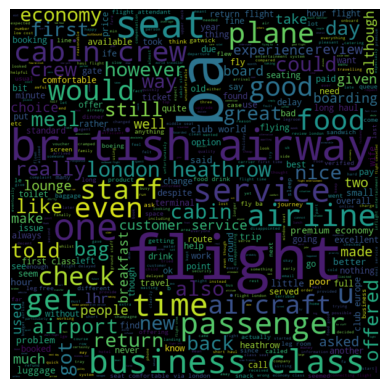

In [171]:
wordcloud=WordCloud(width=600,
    height=600,
    max_font_size=100,max_words=500,stopwords=stopwords).generate(reviews)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [174]:
import nltk
from nltk.corpus import stopwords
reviews=' '.join(df.corpus)
plt.figure(figsize=(20,10))
stopwords=set(stopwords.words('english'))
stopwords.update(['ba','flight','british','airway','however','london','business','class','would','aircraft','heathrow','airline','told','could','even','also'])

<Figure size 2000x1000 with 0 Axes>

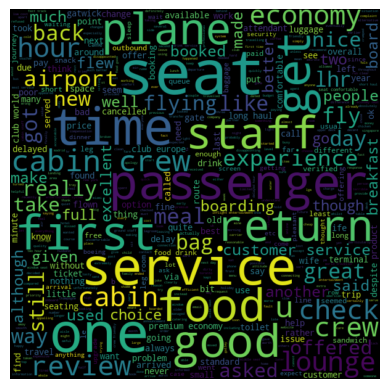

In [176]:
wordcloud=WordCloud(width=600,
    height=600,
    max_font_size=100,max_words=500,stopwords=stopwords).generate(reviews)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

# word frequency

In [188]:
from nltk import ngrams
from nltk.probability import FreqDist
from sklearn.feature_extraction.text import TfidfVectorizer
words=reviews.split(' ')

In [190]:
len(words)

317535

In [192]:
words[0:50]

['fly',
 'first',
 'class',
 'fly',
 'british',
 'airway',
 'uncomfortable',
 'seat',
 'even',
 'get',
 'seat',
 'person',
 'front',
 'seat',
 'reclined',
 'need',
 'recline',
 'seat',
 'pick',
 'anything',
 'floor',
 'flight',
 'bend',
 'touch',
 'floor',
 'enough',
 'space',
 'long',
 'leg',
 'think',
 'going',
 'comfortable',
 'soon',
 'person',
 'front',
 'put',
 'chair',
 'back',
 'knee',
 'crushed',
 'terrible',
 'food',
 'terrible',
 'plane',
 'terrible',
 'air',
 'hostess',
 'terrible',
 'flight',
 'unfortunately']

In [194]:
from sklearn.feature_extraction import text
stopwords=text.ENGLISH_STOP_WORDS.union(['ba','flight','british','airway','reviw','airport','however','lhr','london','business','class','would','aircraft','heathrow','airline','told','could','even','also','even','passenger','1hr','u'])

In [196]:
new_wordee= [i for i in words if i not in stopwords]
print(len(new_wordee))
new_wordee


248617


['fly',
 'fly',
 'uncomfortable',
 'seat',
 'seat',
 'person',
 'seat',
 'reclined',
 'need',
 'recline',
 'seat',
 'pick',
 'floor',
 'bend',
 'touch',
 'floor',
 'space',
 'long',
 'leg',
 'think',
 'going',
 'comfortable',
 'soon',
 'person',
 'chair',
 'knee',
 'crushed',
 'terrible',
 'food',
 'terrible',
 'plane',
 'terrible',
 'air',
 'hostess',
 'terrible',
 'unfortunately',
 'fly',
 'home',
 'verified',
 'singapore',
 'premium',
 'economy',
 'plus',
 'experience',
 'economy',
 'sized',
 'toilet',
 'badly',
 'designed',
 'coffin',
 'shaped',
 'pod',
 'experience',
 'substandard',
 'experience',
 'pod',
 'storage',
 'small',
 'drawer',
 'foot',
 'pod',
 'privacy',
 'screen',
 'opaque',
 'plastic',
 'sheet',
 'kept',
 'awake',
 'neighbour',
 'screen',
 'light',
 'pod',
 'seat',
 'coffin',
 'shaped',
 'bed',
 'cold',
 'hard',
 'plastic',
 'seat',
 'mould',
 'unpleasant',
 'surprise',
 'turn',
 'sleep',
 'choice',
 'neighbour',
 'step',
 'calf',
 'height',
 'footrest',
 'hopefully'

In [198]:
nlp_words=FreqDist(new_wordee).most_common(20)
nlp_words

[('seat', 4639),
 ('service', 3088),
 ('time', 2539),
 ('food', 2410),
 ('crew', 2284),
 ('good', 2126),
 ('cabin', 2117),
 ('hour', 1970),
 ('staff', 1613),
 ('economy', 1447),
 ('check', 1346),
 ('drink', 1234),
 ('plane', 1210),
 ('meal', 1199),
 ('return', 1155),
 ('lounge', 1123),
 ('club', 1113),
 ('boarding', 1054),
 ('experience', 1017),
 ('customer', 1001)]

In [200]:
x=[]
y=[]
for i in nlp_words:
    x.append(i[0])
    y.append(i[1])
print(x)
print(y)
#nlp_words[0]

['seat', 'service', 'time', 'food', 'crew', 'good', 'cabin', 'hour', 'staff', 'economy', 'check', 'drink', 'plane', 'meal', 'return', 'lounge', 'club', 'boarding', 'experience', 'customer']
[4639, 3088, 2539, 2410, 2284, 2126, 2117, 1970, 1613, 1447, 1346, 1234, 1210, 1199, 1155, 1123, 1113, 1054, 1017, 1001]


Text(0.5, 1.0, 'frequent words after nlp')

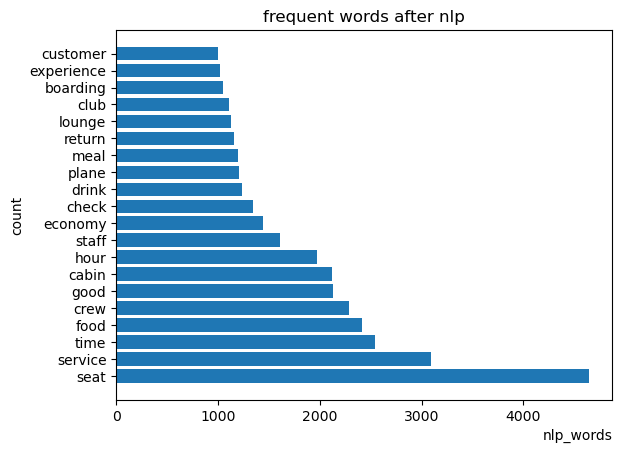

In [202]:
plt.barh(x,y)

#plt.xlabel('
plt.xlabel("nlp_words",horizontalalignment='right', x=1.0) 
plt.ylabel("count")
plt.title("frequent words after nlp")

Text(0.5, 1.0, 'frequent words after nlp')

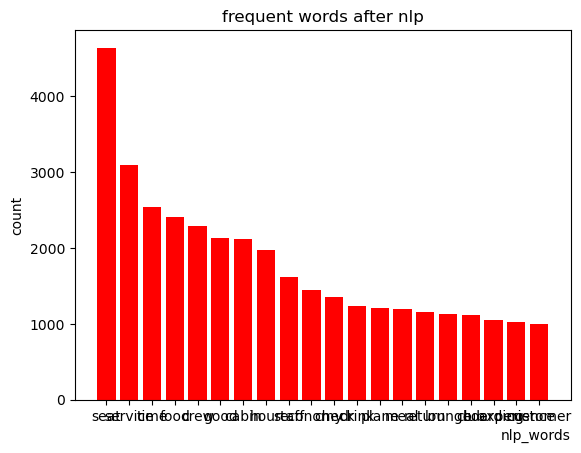

In [204]:
plt.bar(x,y,color='red',width=0.8)
plt.xlabel("nlp_words",horizontalalignment='right', x=1.0) 
plt.ylabel("count")
plt.title("frequent words after nlp")
#plt.xlim(nlp_words)


In [206]:
all_fdist=pd.Series(dict(nlp_words))
all_fdist

seat          4639
service       3088
time          2539
food          2410
crew          2284
good          2126
cabin         2117
hour          1970
staff         1613
economy       1447
check         1346
drink         1234
plane         1210
meal          1199
return        1155
lounge        1123
club          1113
boarding      1054
experience    1017
customer      1001
dtype: int64

<BarContainer object of 20 artists>

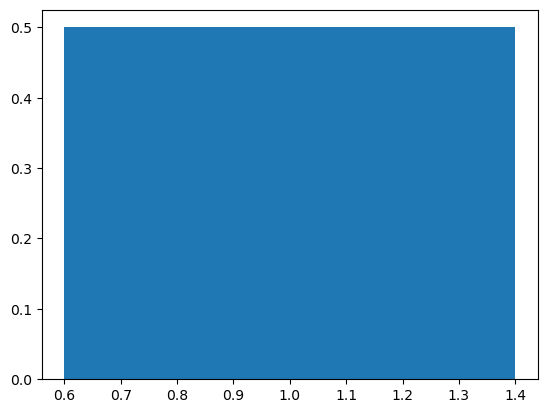

In [208]:
plt.bar(all_fdist.value_counts(),height=0.5)

# word frequency with N-gram

In [211]:
import nltk.collocations as collocations
from nltk import FreqDist, bigrams
reviews=' '.join(df.corpus)

In [213]:
words=reviews.split(' ')

In [215]:
newwords=[i for i in words if i not in stopwords]
newwords

['fly',
 'fly',
 'uncomfortable',
 'seat',
 'seat',
 'person',
 'seat',
 'reclined',
 'need',
 'recline',
 'seat',
 'pick',
 'floor',
 'bend',
 'touch',
 'floor',
 'space',
 'long',
 'leg',
 'think',
 'going',
 'comfortable',
 'soon',
 'person',
 'chair',
 'knee',
 'crushed',
 'terrible',
 'food',
 'terrible',
 'plane',
 'terrible',
 'air',
 'hostess',
 'terrible',
 'unfortunately',
 'fly',
 'home',
 'verified',
 'singapore',
 'premium',
 'economy',
 'plus',
 'experience',
 'economy',
 'sized',
 'toilet',
 'badly',
 'designed',
 'coffin',
 'shaped',
 'pod',
 'experience',
 'substandard',
 'experience',
 'pod',
 'storage',
 'small',
 'drawer',
 'foot',
 'pod',
 'privacy',
 'screen',
 'opaque',
 'plastic',
 'sheet',
 'kept',
 'awake',
 'neighbour',
 'screen',
 'light',
 'pod',
 'seat',
 'coffin',
 'shaped',
 'bed',
 'cold',
 'hard',
 'plastic',
 'seat',
 'mould',
 'unpleasant',
 'surprise',
 'turn',
 'sleep',
 'choice',
 'neighbour',
 'step',
 'calf',
 'height',
 'footrest',
 'hopefully'

{'time_flown_long_haul': 4, 'club_europe_club_world': 4, 'selection_movie_tv_music': 4, 'economy_seat_middle_seat': 4, 'arrival_minute_ahead_schedule': 4, 'checked_online_bag_drop': 4, 'seat_economy_middle_seat': 4, 'crew_provided_good_service': 4, 'time_arrived_minute_early': 4, 'premium_economy_worth_extra': 4, 'flew_new_york_jfk': 4, 'used_gallery_south_lounge': 4, 'cut_long_story_short': 4, 'cabin_crew_friendly_professional': 5, 'avios_amex_companion_voucher': 5, 'san_jose_costa_rica': 5, 'world_traveller_plus_cabin': 5, 'cabin_crew_worked_hard': 5, 'club_world_upper_deck': 5, 'seat_extra_leg_room': 5, 'long_haul_short_haul': 5, 'time_landed_slightly_early': 5, 'leg_room_club_europe': 5, 'featured_new_slim_seat': 5, 'new_club_world_suite': 6, 'cabin_crew_friendly_efficient': 6, 'seat_middle_seat_blocked': 6, 'world_traveller_plus_seat': 6, 'booked_world_traveller_plus': 6, 'cabin_crew_efficient_friendly': 6, 'return_check_quick_security': 6, 'cabin_crew_friendly_helpful': 6, 'left_

<Axes: >

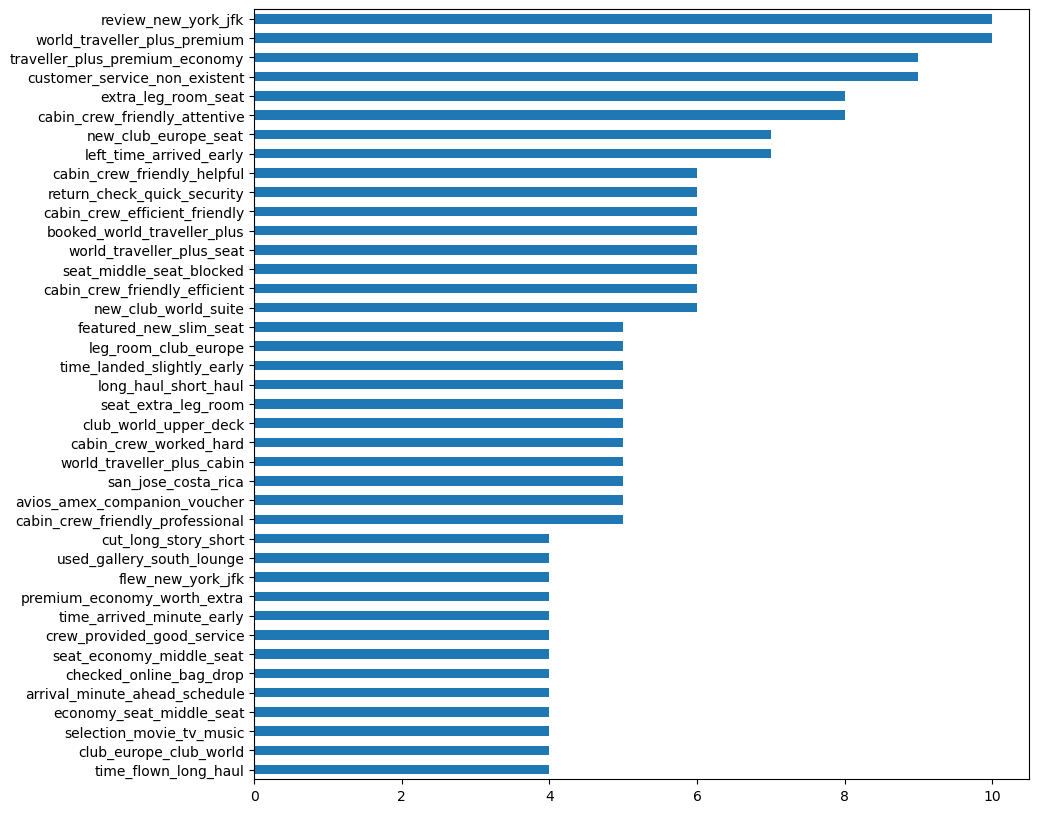

In [219]:
def get_freq_dist(newwords,number_of_ngrams):
    from nltk import ngrams
    ngrams=ngrams(newwords,number_of_ngrams)
    ngram_freq=FreqDist(ngrams).most_common(40)
    ngram_sorted={k:v for k,v in sorted(ngram_freq, key=lambda x: x[1])}
    ngram_joined={'_'.join(k):v for k,v in sorted(ngram_freq, key=lambda item: item[1])}
    print(ngram_joined)
    ngram_frqdist=pd.Series(ngram_joined)
    plt.figure(figsize=(10,10))
    ax=ngram_frqdist.plot(kind='barh')
    return ax

get_freq_dist(newwords,4)

In [221]:
ratings1_3=df[df.stars.isin([1,2,3])]
ratings4_6=df[df.stars.isin([4,5,6])]
ratings7_10=df[df.stars.isin([7,8,9,10])]

In [223]:
ratings1_3

reviews         country  \
1     Not Verified |   Singapore to Heathrow. Busine...     New Zealand   
2     Not Verified |   I reported my damaged/ruined ...  United Kingdom   
3     Not Verified |   On March 1st, I flew from Ber...         Germany   
4     Not Verified | The WORST customer experience! ...  United Kingdom   
5     Not Verified |   Had to cancel my flight month...          Canada   
...                                                 ...             ...   
3809  LHR-HKG on Boeing 747 - 23/08/12. Much has bee...  United Kingdom   
3813  YYZ to LHR - July 2012 - I flew overnight in p...          Canada   
3814  Flew return in CW from LHR to BKK in August 20...         Ireland   
3817  My son who had worked for British Airways urge...  United Kingdom   
3819  SIN-LHR BA12 B747-436 First Class. Old aircraf...  United Kingdom   

      stars             date  \
1         1     16 July 2024   
2         1     15 July 2024   
3         1      9 July 2024   
4         1      5 July 2024   
5         1      1 July 2024   
...     ...              ...   
3809      2     29 Augu 2012   
3813      1     29 Augu 2012   
3814      3     29 Augu 2012   
3817      2  12 October 2011   
3819      1   9 October 2011   

                                                 corpus  
1     verified singapore heathrow business class pre...  
2     verified reported damaged ruined suitcase week...  
3     verified march st flew berlin paulo ba encount...  
4     verified worst customer experience british air...  
5     verified cancel flight month advance due chang...  
...                                                 ...  
3809  lhr hkg boeing much written tired old fleet go...  
3813  yyz lhr july flew overnight premium economy ch...  
3814  flew return cw lhr bkk august positive flight ...  
3817  son worked british airway urged fly british ai...  
3819  sin lhr ba b first class old aircraft seat pri...  

[1760 rows x 5 columns]

In [225]:
ratings4_6

reviews         country  \
0     ✅ Trip Verified | If you can’t fly First Class...   United States   
8     ✅ Trip Verified |  While BA may have made some...          Canada   
10    ✅ Trip Verified |  Four very pleasant, on time...  United Kingdom   
20    Not Verified |  We had a Premium Economy retur...   United States   
33    ✅ Trip Verified |   I flew with British Airway...  United Kingdom   
...                                                 ...             ...   
3796  Lanzarote to Gatwick on 13th April. Flight its...  United Kingdom   
3799  JFK to LHR. Empty check in and priority securi...  United Kingdom   
3800  Chicago O'Hare to London Heathrow on 2 May. ch...  United Kingdom   
3803  Las Vegas-LGW 777 3 class. Business. The uniqu...  United Kingdom   
3810  Just got back from Bridgetown Barbados flying ...  United Kingdom   

      stars          date                                             corpus  
0         5  19 July 2024  fly first class fly british airway uncomfortab...  
8         6  23 June 2024  ba may made positive improvement club world pr...  
10        5  18 June 2024  four pleasant time flight friendly helpful sta...  
20        5   1 June 2024  verified premium economy return flight los ang...  
33        4    5 May 2024  flew british airway heathrow hannover although...  
...     ...           ...                                                ...  
3796      6    7 May 2014  lanzarote gatwick th april flight okay arrival...  
3799      6    6 May 2014  jfk lhr empty check priority security quick ne...  
3800      5    5 May 2014  chicago hare london heathrow may check fast ef...  
3803      6    3 May 2014  la vega lgw class business unique forward faci...  
3810      6  29 Augu 2012  got back bridgetown barbados flying british ai...  

[726 rows x 5 columns]

In [227]:
ratings7_10

reviews         country  \
11    Not Verified |   We travel extensively over 25...  United Kingdom   
13    ✅ Trip Verified |  A very full flight made Pre...  United Kingdom   
14    ✅ Trip Verified | The worst airline I’ve ever ...   United States   
16    ✅ Trip Verified |  Flew British Airways on BA ...  United Kingdom   
17    ✅ Trip Verified |  BA cancelled the flight fro...  United Kingdom   
...                                                 ...             ...   
3811  LHR-JFK-LAX-LHR. Check in was ok apart from be...  United Kingdom   
3812  HKG-LHR in New Club World on Boeing 777-300 - ...  United Kingdom   
3815  Flew LHR - VIE return operated by bmi but BA a...  United Kingdom   
3816  LHR to HAM. Purser addresses all club passenge...  United Kingdom   
3818  London City-New York JFK via Shannon on A318 b...   United States   

      stars             date  \
11        9     18 June 2024   
13        8     17 June 2024   
14        7     16 June 2024   
16        8     10 June 2024   
17        9      9 June 2024   
...     ...              ...   
3811      7     29 Augu 2012   
3812     10     29 Augu 2012   
3815      9     29 Augu 2012   
3816      8     28 Augu 2012   
3818      7  11 October 2011   

                                                 corpus  
11    verified travel extensively year tend use ba r...  
13    full flight made premium economy feel little l...  
14    worst airline ever flown could check flight op...  
16    flew british airway ba london heathrow amsterd...  
17    ba cancelled flight tokyo lhr booked next day ...  
...                                                 ...  
3811  lhr jfk lax lhr check ok apart snapped early c...  
3812  hkg lhr new club world boeing bought ticket wt...  
3815  flew lhr vie return operated bmi ba aircraft a...  
3816  lhr ham purser address club passenger name boa...  
3818  london city new york jfk via shannon really ni...  

[1334 rows x 5 columns]

In [229]:
reviews1_3=' '.join(ratings1_3.corpus)
reviews4_6=' '.join(ratings4_6.corpus)
reviews7_10=' '.join(ratings7_10.corpus)

In [231]:
reviews1_3

'verified singapore heathrow business class premium economy plus experience economy class sized toilet badly designed coffin shaped business class pod experience substandard business class experience business class pod storage small drawer foot pod privacy screen opaque plastic sheet kept awake neighbour screen light pod seat made coffin shaped bed cold hard plastic seat mould unpleasant surprise turn sleep choice neighbour step calf height footrest hopefully brushing foot step neighbour foot footrest footrest heaven forbid try lever comfortable position slightest pressure cause footrest collapse floor level position aisle seat open aisle kiss goodbye privacy view passenger crew lean serve neighbour food talk neighbour privacy screen verified reported damaged ruined suitcase week ago still awaiting reply think twice booking ba customer service shocking say least followed british airway least email per week requesting update joy far verified march st flew berlin paulo ba encountered sev

In [235]:
words1_3=reviews1_3.split(' ')
words4_6=reviews4_6.split(' ')
words7_10=reviews7_10.split(' ')

In [237]:
words1_3

['verified',
 'singapore',
 'heathrow',
 'business',
 'class',
 'premium',
 'economy',
 'plus',
 'experience',
 'economy',
 'class',
 'sized',
 'toilet',
 'badly',
 'designed',
 'coffin',
 'shaped',
 'business',
 'class',
 'pod',
 'experience',
 'substandard',
 'business',
 'class',
 'experience',
 'business',
 'class',
 'pod',
 'storage',
 'small',
 'drawer',
 'foot',
 'pod',
 'privacy',
 'screen',
 'opaque',
 'plastic',
 'sheet',
 'kept',
 'awake',
 'neighbour',
 'screen',
 'light',
 'pod',
 'seat',
 'made',
 'coffin',
 'shaped',
 'bed',
 'cold',
 'hard',
 'plastic',
 'seat',
 'mould',
 'unpleasant',
 'surprise',
 'turn',
 'sleep',
 'choice',
 'neighbour',
 'step',
 'calf',
 'height',
 'footrest',
 'hopefully',
 'brushing',
 'foot',
 'step',
 'neighbour',
 'foot',
 'footrest',
 'footrest',
 'heaven',
 'forbid',
 'try',
 'lever',
 'comfortable',
 'position',
 'slightest',
 'pressure',
 'cause',
 'footrest',
 'collapse',
 'floor',
 'level',
 'position',
 'aisle',
 'seat',
 'open',
 'ai

In [239]:
newwords1_3= [i for i in words1_3 if i not in stopwords]
newwords4_6= [i for i in words4_6 if i not in stopwords]
newwords7_10= [i for i in words7_10 if i not in stopwords]

In [241]:
newwords1_3

['verified',
 'singapore',
 'premium',
 'economy',
 'plus',
 'experience',
 'economy',
 'sized',
 'toilet',
 'badly',
 'designed',
 'coffin',
 'shaped',
 'pod',
 'experience',
 'substandard',
 'experience',
 'pod',
 'storage',
 'small',
 'drawer',
 'foot',
 'pod',
 'privacy',
 'screen',
 'opaque',
 'plastic',
 'sheet',
 'kept',
 'awake',
 'neighbour',
 'screen',
 'light',
 'pod',
 'seat',
 'coffin',
 'shaped',
 'bed',
 'cold',
 'hard',
 'plastic',
 'seat',
 'mould',
 'unpleasant',
 'surprise',
 'turn',
 'sleep',
 'choice',
 'neighbour',
 'step',
 'calf',
 'height',
 'footrest',
 'hopefully',
 'brushing',
 'foot',
 'step',
 'neighbour',
 'foot',
 'footrest',
 'footrest',
 'heaven',
 'forbid',
 'try',
 'lever',
 'comfortable',
 'position',
 'slightest',
 'pressure',
 'cause',
 'footrest',
 'collapse',
 'floor',
 'level',
 'position',
 'aisle',
 'seat',
 'open',
 'aisle',
 'kiss',
 'goodbye',
 'privacy',
 'view',
 'crew',
 'lean',
 'serve',
 'neighbour',
 'food',
 'talk',
 'neighbour',
 '

{'customer_service_extremely_poor': 2, 'meal_service_took_hour': 2, 'yin_yang_seat_configuration': 2, 'experience_new_club_world': 2, 'new_club_world_offering': 2, 'gold_guest_list_member': 2, 'friendly_helpful_cabin_crew': 2, 'board_club_europe_seat': 2, 'cabin_crew_friendly_efficient': 2, 'left_sour_taste_mouth': 2, 'forced_check_hand_luggage': 2, 'landed_minute_late_bag': 2, 'middle_seat_kept_free': 2, 'passport_control_minute_wait': 2, 'extremely_poor_customer_service': 2, 'featured_older_club_world': 2, 'new_club_suite_good': 2, 'mr_gurvir_singh_dhillon': 3, 'flying_world_traveller_plus': 3, 'hr_negative_covid_test': 3, 'arrival_minute_ahead_schedule': 3, 'seat_middle_seat_blocked': 3, 'world_traveller_plus_seat': 3, 'san_jose_costa_rica': 3, 'seat_economy_middle_seat': 3, 'cabin_crew_worked_hard': 3, 'club_world_upper_deck': 3, 'flew_new_york_jfk': 3, 'cabin_crew_efficient_friendly': 3, 'return_check_quick_security': 3, 'food_drink_short_haul': 3, 'club_world_seat_comfortable': 3

<Axes: >

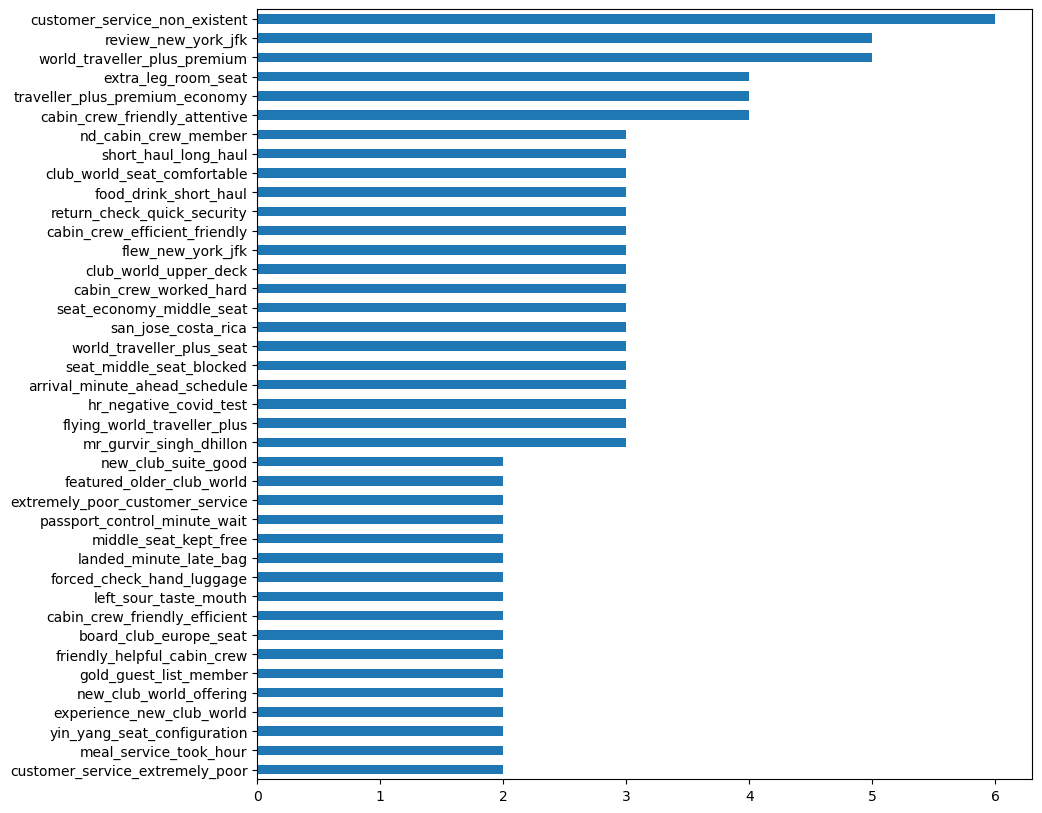

In [243]:
get_freq_dist(newwords1_3,4)

{'hour_phone_customer_service': 2, 'fast_track_security_terrible': 2, 'meal_choice_main_course': 2, 'cabin_crew_nice_friendly': 2, 'use_fast_track_security': 2, 'crew_excellent_good_choice': 2, 'cabin_crew_service_excellent': 2, 'old_club_world_seat': 2, 'club_europe_seat_comfortable': 2, 'avios_amex_companion_voucher': 2, 'boarding_quick_cabin_crew': 2, 'quick_cabin_crew_friendly': 2, 'fast_track_security_fast': 2, 'club_europe_worth_money': 2, 'minute_scheduled_departure_time': 2, 'looking_forward_flying_new': 2, 'seat_usual_economy_seat': 2, 'outbound_return_club_world': 2, 'provide_evidence_baggage_policy': 2, 'cabin_crew_professional_friendly': 2, 'left_time_arrived_early': 2, 'seat_j_k_upper': 2, 'j_k_upper_deck': 2, 'worst_long_haul_experienced': 2, 'say_worst_long_haul': 2, 'leg_room_seat_width': 2, 'paid_extra_legroom_seat': 2, 'seat_premium_economy_overbooked': 2, 'club_europe_club_world': 2, 'excellent_premium_economy_product': 2, 'world_traveller_plus_seat': 2, 'cut_long_st

<Axes: >

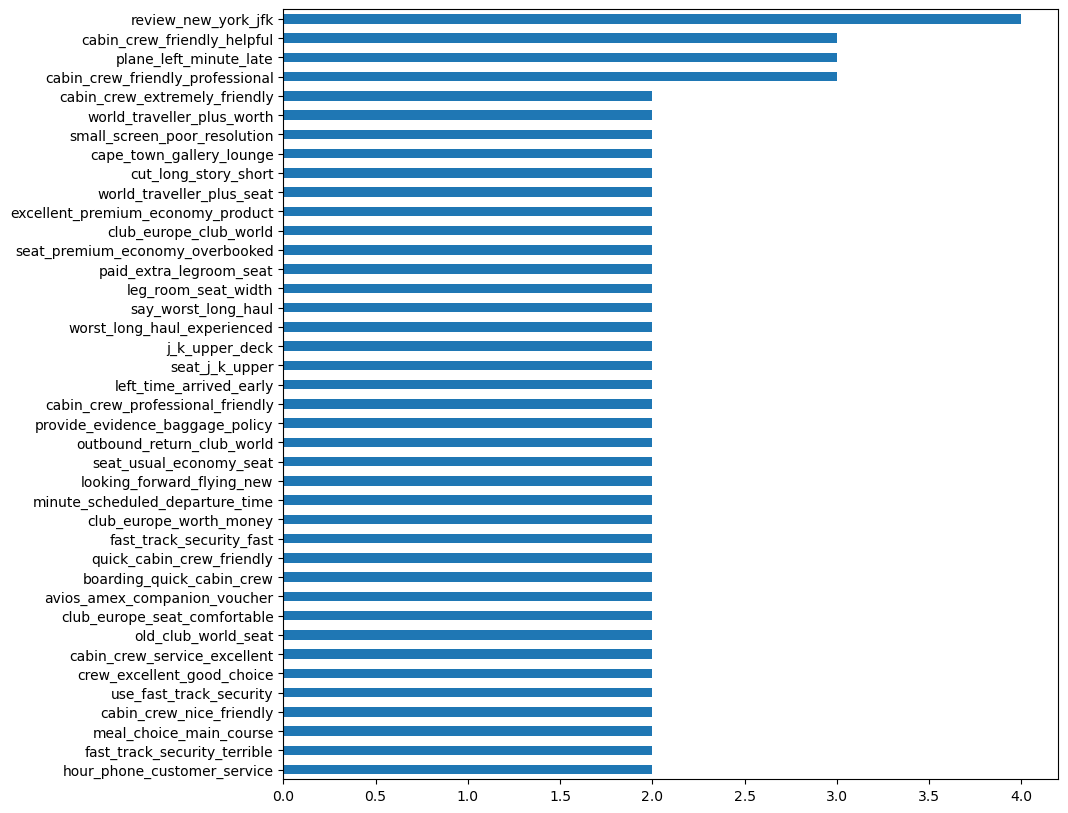

In [245]:
get_freq_dist(newwords4_6,4)

{'check_online_accept_passport': 2, 'arrived_hour_scheduled_departure': 2, 'food_good_crew_attentive': 2, 'worse_low_cost_carrier': 2, 'low_cost_carrier_experience': 2, 'customer_service_non_existent': 2, 'year_gold_card_holder': 2, 'middle_seat_left_free': 2, 'coach_seat_middle_seat': 2, 'good_food_average_entertainment': 2, 'seat_minute_charged_select': 2, 'return_journey_buenos_aire': 2, 'experience_world_traveller_plus': 2, 'cabin_crew_pleasant_helpful': 2, 'refund_cost_booking_seat': 2, 'selection_movie_tv_music': 2, 'good_service_cabin_crew': 2, 'economy_seat_middle_seat': 2, 'seat_middle_seat_blocked': 2, 'club_world_cabin_upper': 2, 'world_cabin_upper_deck': 2, 'cabin_crew_good_food': 2, 'eye_shade_ear_plug': 2, 'food_good_wine_offering': 2, 'seat_fully_recline_unlike': 2, 'new_club_world_suite': 3, 'left_time_arrived_early': 3, 'seat_prior_hour_check': 3, 'club_europe_worth_extra': 3, 'extra_leg_room_seat': 3, 'booked_world_traveller_plus': 3, 'cabin_crew_ground_staff': 3, 'st

<Axes: >

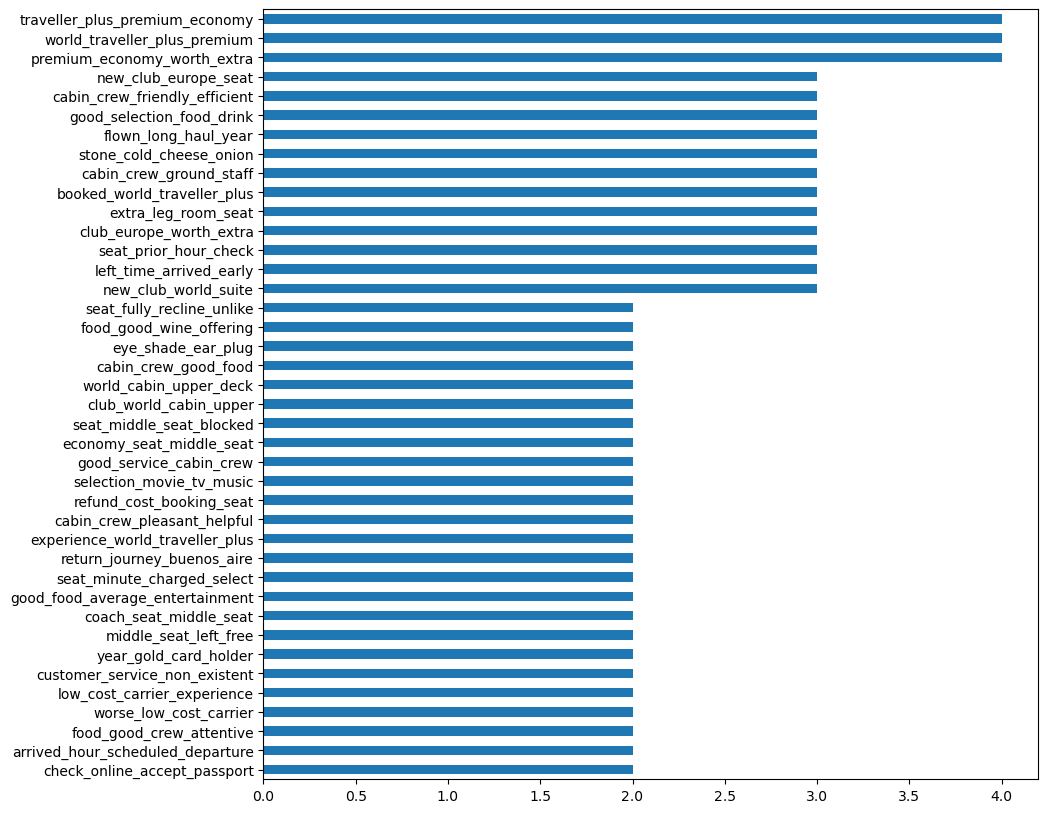

In [247]:
get_freq_dist(newwords7_10,4)

In [254]:
df['polarity']=0

SENTIMENT ANALYSIS

In [256]:
%%capture # output is suppressed
#%%capture my_output output stored in my_output and we will find the my_output.stdout & my_output.stderr
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
df['polarity']=0
for i in range(len(df.corpus)):
    sent=TextBlob(df.corpus[i]) # like parts of speech
    polarity=sent.sentiment.polarity # Polarity refers to the degree of positivity or negativity expressed within a given text.
    subjectivity=sent.sentiment.subjectivity #Subjectivity in language refers to those subtle cues that reveal personal opinions, evaluations, and speculations. Imagine words donning tiny opinion hats or sentences whispering secrets about their feelings. I
    df['polarity'][i]=polarity

UsageError: unrecognized arguments: output is suppressed


In [258]:
print(f"{df[(df['polarity'] >-0.2) & (df['polarity']<0.2)].shape[0]} number of reviews between -0.2 and 0.2 polarity score")
print(f"{df[(df['polarity'] >-0.1) & (df['polarity']<0.1)].shape[0]} number of reviews between -0.1 and 0.1 polarity score") # neural +zone

3820 number of reviews between -0.2 and 0.2 polarity score
3820 number of reviews between -0.1 and 0.1 polarity score


In [260]:
df.columns

Index(['reviews', 'country', 'stars', 'date', 'corpus', 'polarity'], dtype='object')

In [262]:
df['polarity']

0       0
1       0
2       0
3       0
4       0
       ..
3815    0
3816    0
3817    0
3818    0
3819    0
Name: polarity, Length: 3820, dtype: int64

In [266]:
print(f"{df[(df['polarity'] >-0.2)].shape[0]} number of reviews above 0.2 polarity score")


3820 number of reviews above 0.2 polarity score


In [268]:
%%capture
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\sivas\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [270]:
vds=SentimentIntensityAnalyzer()
df['label']=0

In [272]:
for i in range(len(df.corpus)):
    score=vds.polarity_scores(df.corpus[i])['compound']
    if score>0.2:
        df['label'][i]=1
    elif score<0:
        df['label'][i]=-1
    else:
        df['label'][i]=0

C:\Users\sivas\AppData\Local\Temp\ipykernel_2800\1767070621.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'][i]=-1
C:\Users\sivas\AppData\Local\Temp\ipykernel_2800\1767070621.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'][i]=-1
C:\Users\sivas\AppData\Local\Temp\ipykernel_2800\1767070621.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'][i]=-1
C:\Users\sivas\AppData\Local\Temp\ipykernel_2800\

In [274]:
df.label.value_counts()

label
 1    2434
-1    1259
 0     127
Name: count, dtype: int64

# topic modeling with LDA

In [277]:
%%capture
from sklearn.feature_extraction.text import CountVectorizer
vect=CountVectorizer()
tf=vect.fit_transform(df.corpus).toarray()

In [278]:
tf_featurenames=vect.get_feature_names_out()
tf_featurenames[0:20]

array(['aa', 'ab', 'aback', 'abandon', 'abandondoned', 'abandoned',
       'abandoning', 'abba', 'abbreviate', 'abbreviated', 'abd',
       'abdication', 'aberdeen', 'ability', 'abject', 'able', 'abnormal',
       'abnormally', 'aboard', 'abolish'], dtype=object)

In [279]:
from sklearn.decomposition import LatentDirichletAllocation
numberoftopics=8
model=LatentDirichletAllocation(n_components=numberoftopics,random_state=0)
model.fit(tf)

topic_dict={}

for topicidx,topic in enumerate(model.components_):
    topic_dict["topic %d words" % (topicidx)]=['{}'.format(tf_featurenames[i])
            for i in topic.argsort()[:-10 - 1:-1]]
    topic_dict["topic %d weights" % (topicidx)]=['{:.1f}'.format(topic[i])
            for i in topic.argsort()[:-10 - 1:-1]]
df_topic=pd.DataFrame(topic_dict)

In [282]:
df_topic

topic 0 words topic 0 weights topic 1 words topic 1 weights topic 2 words  \
0          seat          1230.8        flight          1201.0          meal   
1            ba           657.6        airway           676.1         drink   
2         class           557.9       british           672.9        flight   
3        flight           545.9          crew           576.1          food   
4       british           468.2        london           486.5        served   
5      business           466.5          good           471.6       service   
6        airway           463.6         cabin           458.7          seat   
7         check           455.5          food           424.9           one   
8       service           388.1       service           376.6         cabin   
9           one           355.8      heathrow           340.4       economy   

  topic 2 weights topic 3 words topic 3 weights topic 4 words topic 4 weights  \
0           579.8          seat          2194.6            ba           724.1   
1           382.0        flight          1888.5       airline           657.2   
2           355.7            ba          1687.0        flight           455.0   
3           322.0          good          1361.9       service           351.9   
4           297.6         class          1227.2       british           306.3   
5           285.3          food          1147.3        airway           298.9   
6           258.2       service          1049.3        review           243.7   
7           246.7          club           986.5          cost           236.4   
8           243.8      business           948.8          food           231.0   
9           233.0          crew           935.9        london           222.9   

   topic 5 words topic 5 weights topic 6 words topic 6 weights topic 7 words  \
0         flight           497.0        flight          1869.3        flight   
1           seat           255.6            ba           968.9            ba   
2             ba           143.4          hour           615.4      customer   
3  entertainment           127.9     passenger           542.6           day   
4         london           127.6         check           498.0          hour   
5           hour           105.7          time           490.4           get   
6           time           101.9      boarding           488.0        london   
7           long            89.1        minute           456.6        airway   
8         return            85.6          crew           448.6       british   
9         system            79.2           bag           429.6       service   

  topic 7 weights  
0          1417.6  
1           734.7  
2           492.9  
3           491.7  
4           480.6  
5           414.4  
6           407.7  
7           378.1  
8           377.3  
9           363.8

In [163]:
df.country.value_counts()

country
United Kingdom           2391
United States             432
Australia                 161
Canada                    124
Germany                    67
                         ... 
Panama                      1
Jordan                      1
Vietnam                     1
Saint Kitts and Nevis       1
Oman                        1
Name: count, Length: 72, dtype: int64

In [509]:
c=df.stars.value_counts()
c

stars
1     901
2     430
3     425
8     374
10    329
9     318
7     313
5     275
4     252
6     198
Name: count, dtype: int64

In [511]:
y=[]
for i in c:
    print(i)
    y.append(i)
y

901
430
425
374
329
318
313
275
252
198


[901, 430, 425, 374, 329, 318, 313, 275, 252, 198]

In [513]:
x=[1,2,3,8,10,9,7,5,4,6]

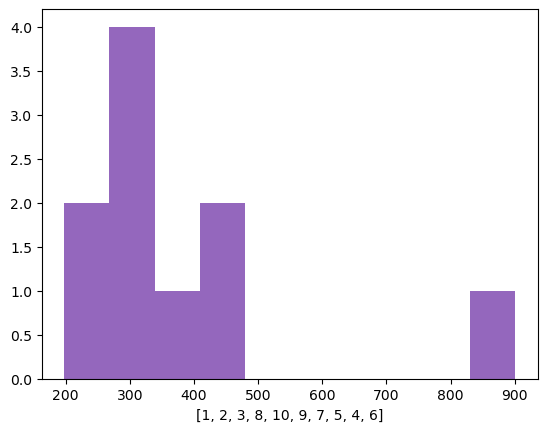

In [529]:
for i in df.stars:
    plt.hist(df.stars.value_counts(),bins=10)
    plt.xlabel(x)

# MACHINE LEARNING MODEL 


In [253]:
import pandas as pd

In [255]:
dff=pd.read_csv("C:\\Users\\sivas\\OneDrive\\Desktop\\accenture 1\\customer_booking.csv",  encoding="ISO-8859-1")

In [257]:
dff.head()

num_passengers sales_channel  trip_type  purchase_lead  length_of_stay  \
0               2      Internet  RoundTrip            262              19   
1               1      Internet  RoundTrip            112              20   
2               2      Internet  RoundTrip            243              22   
3               1      Internet  RoundTrip             96              31   
4               2      Internet  RoundTrip             68              22   

   flight_hour flight_day   route booking_origin  wants_extra_baggage  \
0            7        Sat  AKLDEL    New Zealand                    1   
1            3        Sat  AKLDEL    New Zealand                    0   
2           17        Wed  AKLDEL          India                    1   
3            4        Sat  AKLDEL    New Zealand                    0   
4           15        Wed  AKLDEL          India                    1   

   wants_preferred_seat  wants_in_flight_meals  flight_duration  \
0                     0                      0             5.52   
1                     0                      0             5.52   
2                     1                      0             5.52   
3                     0                      1             5.52   
4                     0                      1             5.52   

   booking_complete  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0

In [259]:
dff.shape

(50000, 14)

In [261]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [263]:
dff.describe()

num_passengers  purchase_lead  length_of_stay  flight_hour  \
count    50000.000000   50000.000000     50000.00000  50000.00000   
mean         1.591240      84.940480        23.04456      9.06634   
std          1.020165      90.451378        33.88767      5.41266   
min          1.000000       0.000000         0.00000      0.00000   
25%          1.000000      21.000000         5.00000      5.00000   
50%          1.000000      51.000000        17.00000      9.00000   
75%          2.000000     115.000000        28.00000     13.00000   
max          9.000000     867.000000       778.00000     23.00000   

       wants_extra_baggage  wants_preferred_seat  wants_in_flight_meals  \
count         50000.000000          50000.000000           50000.000000   
mean              0.668780              0.296960               0.427140   
std               0.470657              0.456923               0.494668   
min               0.000000              0.000000               0.000000   
25%               0.000000              0.000000               0.000000   
50%               1.000000              0.000000               0.000000   
75%               1.000000              1.000000               1.000000   
max               1.000000              1.000000               1.000000   

       flight_duration  booking_complete  
count     50000.000000      50000.000000  
mean          7.277561          0.149560  
std           1.496863          0.356643  
min           4.670000          0.000000  
25%           5.620000          0.000000  
50%           7.570000          0.000000  
75%           8.830000          0.000000  
max           9.500000          1.000000

In [265]:
dff['flight_day'].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [267]:
mapping={
    'Mon':1,
    'Tue':2,
    'Wed':3,
    'Thu':4,
    'Fri':5,
    'Sat':6,
    'Sun':7}

In [269]:
dff['flight_day']=dff['flight_day'].map(mapping)

In [271]:
dff['flight_day'].unique()

array([6, 3, 4, 1, 7, 2, 5], dtype=int64)

# SALES CHANNEL

In [274]:
dff['sales_channel'].unique()

array(['Internet', 'Mobile'], dtype=object)

In [276]:
dff['sales_channel'].value_counts()

sales_channel
Internet    44382
Mobile       5618
Name: count, dtype: int64

In [278]:
sales_per_internet=dff['sales_channel'].value_counts()[0]/dff['sales_channel'].count()*100
sales_per_internet

C:\Users\sivas\AppData\Local\Temp\ipykernel_19244\1475423005.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sales_per_internet=dff['sales_channel'].value_counts()[0]/dff['sales_channel'].count()*100


88.764

In [280]:
sales_per_mobile=dff['sales_channel'].value_counts()[1]/dff['sales_channel'].count()*100
sales_per_mobile

C:\Users\sivas\AppData\Local\Temp\ipykernel_19244\1597299354.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sales_per_mobile=dff['sales_channel'].value_counts()[1]/dff['sales_channel'].count()*100


11.236

# TRIP TYPE

In [283]:
dff['trip_type'].value_counts()

trip_type
RoundTrip     49497
OneWay          387
CircleTrip      116
Name: count, dtype: int64

In [285]:
per_RoundTrip=dff['trip_type'].value_counts()[0]/dff['trip_type'].count()*100
per_RoundTrip

C:\Users\sivas\AppData\Local\Temp\ipykernel_19244\706841387.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  per_RoundTrip=dff['trip_type'].value_counts()[0]/dff['trip_type'].count()*100


98.994

In [287]:
per_OneWay=dff['trip_type'].value_counts()[1]/dff['trip_type'].count()*100
per_OneWay

C:\Users\sivas\AppData\Local\Temp\ipykernel_19244\2937130206.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  per_OneWay=dff['trip_type'].value_counts()[1]/dff['trip_type'].count()*100


0.774

In [289]:
per_CircleTrip=dff['trip_type'].value_counts()[2]/dff['trip_type'].count()*100
per_CircleTrip

C:\Users\sivas\AppData\Local\Temp\ipykernel_19244\2195809263.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  per_CircleTrip=dff['trip_type'].value_counts()[2]/dff['trip_type'].count()*100


0.232

# PURCHASE LEAD

its the rebooking period

C:\Users\sivas\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='purchase_lead', ylabel='Count'>

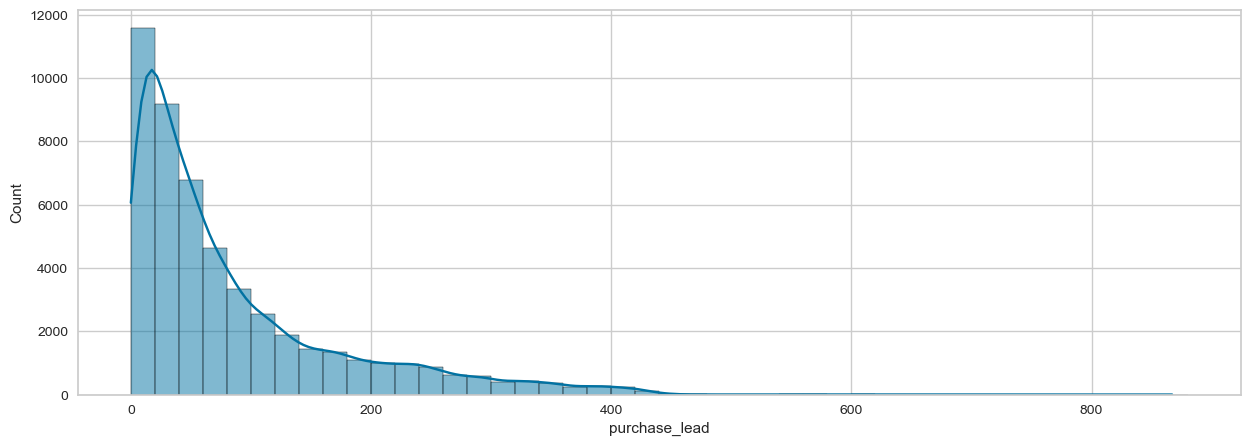

In [295]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,5))
sns.histplot(data=dff,x='purchase_lead',binwidth=20,kde=True)

In [297]:
dff['purchase_lead'].value_counts()[0]

370

In [299]:
(dff['purchase_lead']>600).value_counts() # more than 600 days before nobody was booking so we have to remove the rows

purchase_lead
False    49992
True         8
Name: count, dtype: int64

In [301]:
dff[dff['purchase_lead']>600]# more than 600 days before nobody was booking so we have to remove the rows

num_passengers sales_channel  trip_type  purchase_lead  length_of_stay  \
835                 3      Internet  RoundTrip            641              46   
6148                1      Internet  RoundTrip            614              19   
24119               1      Internet  RoundTrip            704              23   
38356               2      Internet  RoundTrip            633               5   
39417               1        Mobile  RoundTrip            625               5   
42916               1        Mobile  RoundTrip            605               6   
46716               2      Internet  RoundTrip            606               6   
48259               3      Internet  RoundTrip            867               6   

       flight_hour  flight_day   route   booking_origin  wants_extra_baggage  \
835              6           7  AKLKUL         Malaysia                    1   
6148            11           3  COKMEL        Australia                    0   
24119            8           2  PNHSYD        Australia                    0   
38356           10           6  HKTOOL        Australia                    0   
39417           15           5  ICNRGN  Myanmar (Burma)                    0   
42916           18           4  BLRMEL            India                    0   
46716            6           5  HKTTPE    United States                    0   
48259            7           1  KIXMLE            Japan                    0   

       wants_preferred_seat  wants_in_flight_meals  flight_duration  \
835                       0                      1             8.83   
6148                      0                      0             8.83   
24119                     0                      0             8.58   
38356                     0                      1             8.83   
39417                     0                      0             6.62   
42916                     0                      0             8.83   
46716                     0                      1             4.67   
48259                     0                      1             7.00   

       booking_complete  
835                   1  
6148                  0  
24119                 0  
38356                 0  
39417                 0  
42916                 0  
46716                 0  
48259                 1

In [303]:
df=dff[dff['purchase_lead']<600]
df

num_passengers sales_channel  trip_type  purchase_lead  length_of_stay  \
0                   2      Internet  RoundTrip            262              19   
1                   1      Internet  RoundTrip            112              20   
2                   2      Internet  RoundTrip            243              22   
3                   1      Internet  RoundTrip             96              31   
4                   2      Internet  RoundTrip             68              22   
...               ...           ...        ...            ...             ...   
49995               2      Internet  RoundTrip             27               6   
49996               1      Internet  RoundTrip            111               6   
49997               1      Internet  RoundTrip             24               6   
49998               1      Internet  RoundTrip             15               6   
49999               1      Internet  RoundTrip             19               6   

       flight_hour  flight_day   route booking_origin  wants_extra_baggage  \
0                7           6  AKLDEL    New Zealand                    1   
1                3           6  AKLDEL    New Zealand                    0   
2               17           3  AKLDEL          India                    1   
3                4           6  AKLDEL    New Zealand                    0   
4               15           3  AKLDEL          India                    1   
...            ...         ...     ...            ...                  ...   
49995            9           6  PERPNH      Australia                    1   
49996            4           7  PERPNH      Australia                    0   
49997           22           6  PERPNH      Australia                    0   
49998           11           1  PERPNH      Australia                    1   
49999           10           4  PERPNH      Australia                    0   

       wants_preferred_seat  wants_in_flight_meals  flight_duration  \
0                         0                      0             5.52   
1                         0                      0             5.52   
2                         1                      0             5.52   
3                         0                      1             5.52   
4                         0                      1             5.52   
...                     ...                    ...              ...   
49995                     0                      1             5.62   
49996                     0                      0             5.62   
49997                     0                      1             5.62   
49998                     0                      1             5.62   
49999                     1                      0             5.62   

       booking_complete  
0                     0  
1                     0  
2                     0  
3                     0  
4                     0  
...                 ...  
49995                 0  
49996                 0  
49997                 0  
49998                 0  
49999                 0  

[49992 rows x 14 columns]

In [305]:
dff['purchase_lead'].unique()

array([262, 112, 243,  96,  68,   3, 201, 238,  80, 378, 185,   8, 265,
       245, 192, 259,  19,  67, 351, 228,  21,  23,  25,  16,  66,  51,
        37, 101,   7,   5,  33,  20,  56,  13,  71, 346,   9,  65, 221,
       107,  14,  77,  24,  47,  22,  11,  35, 272, 250, 161, 128, 190,
       311,  27, 314, 102,   2,  26,  32,  57, 198, 120,  69, 281, 282,
        15,  31, 316, 232, 156, 196, 283,  34,  63,   6, 227, 181, 138,
       134,  85,  93, 118,  90, 168, 127,  18, 153, 186, 263, 172, 230,
        42,  81, 140, 285, 179, 341, 173, 180, 366, 229, 174,  82,  75,
       163, 105, 276, 110,  83, 154,  55,  45,  54, 193,  10, 166,  97,
       239, 182,  99,  53,  28, 384,  70, 126, 142,  87,  86, 313,  41,
        91, 206, 197, 268, 157, 145, 241, 139,  59, 396, 280,  79, 380,
       132, 121, 419,  58, 115, 236, 225, 116, 191, 275, 417, 159,  92,
       106, 218, 295,  12, 305, 235, 332, 125, 204, 310, 368, 169, 214,
       155, 325, 130, 189, 226, 122,  88, 211, 188, 129, 149,  3

In [307]:
df_final=df
df_final

num_passengers sales_channel  trip_type  purchase_lead  length_of_stay  \
0                   2      Internet  RoundTrip            262              19   
1                   1      Internet  RoundTrip            112              20   
2                   2      Internet  RoundTrip            243              22   
3                   1      Internet  RoundTrip             96              31   
4                   2      Internet  RoundTrip             68              22   
...               ...           ...        ...            ...             ...   
49995               2      Internet  RoundTrip             27               6   
49996               1      Internet  RoundTrip            111               6   
49997               1      Internet  RoundTrip             24               6   
49998               1      Internet  RoundTrip             15               6   
49999               1      Internet  RoundTrip             19               6   

       flight_hour  flight_day   route booking_origin  wants_extra_baggage  \
0                7           6  AKLDEL    New Zealand                    1   
1                3           6  AKLDEL    New Zealand                    0   
2               17           3  AKLDEL          India                    1   
3                4           6  AKLDEL    New Zealand                    0   
4               15           3  AKLDEL          India                    1   
...            ...         ...     ...            ...                  ...   
49995            9           6  PERPNH      Australia                    1   
49996            4           7  PERPNH      Australia                    0   
49997           22           6  PERPNH      Australia                    0   
49998           11           1  PERPNH      Australia                    1   
49999           10           4  PERPNH      Australia                    0   

       wants_preferred_seat  wants_in_flight_meals  flight_duration  \
0                         0                      0             5.52   
1                         0                      0             5.52   
2                         1                      0             5.52   
3                         0                      1             5.52   
4                         0                      1             5.52   
...                     ...                    ...              ...   
49995                     0                      1             5.62   
49996                     0                      0             5.62   
49997                     0                      1             5.62   
49998                     0                      1             5.62   
49999                     1                      0             5.62   

       booking_complete  
0                     0  
1                     0  
2                     0  
3                     0  
4                     0  
...                 ...  
49995                 0  
49996                 0  
49997                 0  
49998                 0  
49999                 0  

[49992 rows x 14 columns]

# one hot encoding the categorical columns

In [310]:
from sklearn.preprocessing import OneHotEncoder

In [312]:
encoder=OneHotEncoder(handle_unknown='ignore')

In [314]:
encoder_df=pd.DataFrame(encoder.fit_transform(dff[['sales_channel']]).toarray())
encoder_df=encoder_df.rename(columns={0:'Internet',1:'Mobile'})
df_final=df_final.join(encoder_df)

In [316]:
df_final

num_passengers sales_channel  trip_type  purchase_lead  length_of_stay  \
0                   2      Internet  RoundTrip            262              19   
1                   1      Internet  RoundTrip            112              20   
2                   2      Internet  RoundTrip            243              22   
3                   1      Internet  RoundTrip             96              31   
4                   2      Internet  RoundTrip             68              22   
...               ...           ...        ...            ...             ...   
49995               2      Internet  RoundTrip             27               6   
49996               1      Internet  RoundTrip            111               6   
49997               1      Internet  RoundTrip             24               6   
49998               1      Internet  RoundTrip             15               6   
49999               1      Internet  RoundTrip             19               6   

       flight_hour  flight_day   route booking_origin  wants_extra_baggage  \
0                7           6  AKLDEL    New Zealand                    1   
1                3           6  AKLDEL    New Zealand                    0   
2               17           3  AKLDEL          India                    1   
3                4           6  AKLDEL    New Zealand                    0   
4               15           3  AKLDEL          India                    1   
...            ...         ...     ...            ...                  ...   
49995            9           6  PERPNH      Australia                    1   
49996            4           7  PERPNH      Australia                    0   
49997           22           6  PERPNH      Australia                    0   
49998           11           1  PERPNH      Australia                    1   
49999           10           4  PERPNH      Australia                    0   

       wants_preferred_seat  wants_in_flight_meals  flight_duration  \
0                         0                      0             5.52   
1                         0                      0             5.52   
2                         1                      0             5.52   
3                         0                      1             5.52   
4                         0                      1             5.52   
...                     ...                    ...              ...   
49995                     0                      1             5.62   
49996                     0                      0             5.62   
49997                     0                      1             5.62   
49998                     0                      1             5.62   
49999                     1                      0             5.62   

       booking_complete  Internet  Mobile  
0                     0       1.0     0.0  
1                     0       1.0     0.0  
2                     0       1.0     0.0  
3                     0       1.0     0.0  
4                     0       1.0     0.0  
...                 ...       ...     ...  
49995                 0       1.0     0.0  
49996                 0       1.0     0.0  
49997                 0       1.0     0.0  
49998                 0       1.0     0.0  
49999                 0       1.0     0.0  

[49992 rows x 16 columns]

In [318]:
df_final['Internet'].unique()

array([1., 0.])

In [320]:
encoder_df=pd.DataFrame(encoder.fit_transform(dff[['trip_type']]).toarray())
encoder_df=encoder_df.rename(columns={0:'RoundTrip',1:'OneWayTrip',2:'CircleTrip'})
df_final=df_final.join(encoder_df)

In [322]:
encoder_df

RoundTrip  OneWayTrip  CircleTrip
0            0.0         0.0         1.0
1            0.0         0.0         1.0
2            0.0         0.0         1.0
3            0.0         0.0         1.0
4            0.0         0.0         1.0
...          ...         ...         ...
49995        0.0         0.0         1.0
49996        0.0         0.0         1.0
49997        0.0         0.0         1.0
49998        0.0         0.0         1.0
49999        0.0         0.0         1.0

[50000 rows x 3 columns]

In [324]:
df_final

num_passengers sales_channel  trip_type  purchase_lead  length_of_stay  \
0                   2      Internet  RoundTrip            262              19   
1                   1      Internet  RoundTrip            112              20   
2                   2      Internet  RoundTrip            243              22   
3                   1      Internet  RoundTrip             96              31   
4                   2      Internet  RoundTrip             68              22   
...               ...           ...        ...            ...             ...   
49995               2      Internet  RoundTrip             27               6   
49996               1      Internet  RoundTrip            111               6   
49997               1      Internet  RoundTrip             24               6   
49998               1      Internet  RoundTrip             15               6   
49999               1      Internet  RoundTrip             19               6   

       flight_hour  flight_day   route booking_origin  wants_extra_baggage  \
0                7           6  AKLDEL    New Zealand                    1   
1                3           6  AKLDEL    New Zealand                    0   
2               17           3  AKLDEL          India                    1   
3                4           6  AKLDEL    New Zealand                    0   
4               15           3  AKLDEL          India                    1   
...            ...         ...     ...            ...                  ...   
49995            9           6  PERPNH      Australia                    1   
49996            4           7  PERPNH      Australia                    0   
49997           22           6  PERPNH      Australia                    0   
49998           11           1  PERPNH      Australia                    1   
49999           10           4  PERPNH      Australia                    0   

       wants_preferred_seat  wants_in_flight_meals  flight_duration  \
0                         0                      0             5.52   
1                         0                      0             5.52   
2                         1                      0             5.52   
3                         0                      1             5.52   
4                         0                      1             5.52   
...                     ...                    ...              ...   
49995                     0                      1             5.62   
49996                     0                      0             5.62   
49997                     0                      1             5.62   
49998                     0                      1             5.62   
49999                     1                      0             5.62   

       booking_complete  Internet  Mobile  RoundTrip  OneWayTrip  CircleTrip  
0                     0       1.0     0.0        0.0         0.0         1.0  
1                     0       1.0     0.0        0.0         0.0         1.0  
2                     0       1.0     0.0        0.0         0.0         1.0  
3                     0       1.0     0.0        0.0         0.0         1.0  
4                     0       1.0     0.0        0.0         0.0         1.0  
...                 ...       ...     ...        ...         ...         ...  
49995                 0       1.0     0.0        0.0         0.0         1.0  
49996                 0       1.0     0.0        0.0         0.0         1.0  
49997                 0       1.0     0.0        0.0         0.0         1.0  
49998                 0       1.0     0.0        0.0         0.0         1.0  
49999                 0       1.0     0.0        0.0         0.0         1.0  

[49992 rows x 19 columns]

In [326]:
df_final.drop(['sales_channel','trip_type','booking_origin','route'],axis=1,inplace=True)

In [328]:
df_final

num_passengers  purchase_lead  length_of_stay  flight_hour  flight_day  \
0                   2            262              19            7           6   
1                   1            112              20            3           6   
2                   2            243              22           17           3   
3                   1             96              31            4           6   
4                   2             68              22           15           3   
...               ...            ...             ...          ...         ...   
49995               2             27               6            9           6   
49996               1            111               6            4           7   
49997               1             24               6           22           6   
49998               1             15               6           11           1   
49999               1             19               6           10           4   

       wants_extra_baggage  wants_preferred_seat  wants_in_flight_meals  \
0                        1                     0                      0   
1                        0                     0                      0   
2                        1                     1                      0   
3                        0                     0                      1   
4                        1                     0                      1   
...                    ...                   ...                    ...   
49995                    1                     0                      1   
49996                    0                     0                      0   
49997                    0                     0                      1   
49998                    1                     0                      1   
49999                    0                     1                      0   

       flight_duration  booking_complete  Internet  Mobile  RoundTrip  \
0                 5.52                 0       1.0     0.0        0.0   
1                 5.52                 0       1.0     0.0        0.0   
2                 5.52                 0       1.0     0.0        0.0   
3                 5.52                 0       1.0     0.0        0.0   
4                 5.52                 0       1.0     0.0        0.0   
...                ...               ...       ...     ...        ...   
49995             5.62                 0       1.0     0.0        0.0   
49996             5.62                 0       1.0     0.0        0.0   
49997             5.62                 0       1.0     0.0        0.0   
49998             5.62                 0       1.0     0.0        0.0   
49999             5.62                 0       1.0     0.0        0.0   

       OneWayTrip  CircleTrip  
0             0.0         1.0  
1             0.0         1.0  
2             0.0         1.0  
3             0.0         1.0  
4             0.0         1.0  
...           ...         ...  
49995         0.0         1.0  
49996         0.0         1.0  
49997         0.0         1.0  
49998         0.0         1.0  
49999         0.0         1.0  

[49992 rows x 15 columns]

In [330]:
df_final['booking_complete'].unique()

array([0, 1], dtype=int64)

In [332]:
df_final['booking_complete'].value_counts()

booking_complete
0    42516
1     7476
Name: count, dtype: int64

# Normalizing the values

In [334]:
from sklearn.preprocessing import StandardScaler

In [336]:
scaler=StandardScaler()

In [338]:
df_final['label']=df_final.booking_complete
df_final.drop('booking_complete',axis=1,inplace=True)

In [340]:
df_final

num_passengers  purchase_lead  length_of_stay  flight_hour  flight_day  \
0                   2            262              19            7           6   
1                   1            112              20            3           6   
2                   2            243              22           17           3   
3                   1             96              31            4           6   
4                   2             68              22           15           3   
...               ...            ...             ...          ...         ...   
49995               2             27               6            9           6   
49996               1            111               6            4           7   
49997               1             24               6           22           6   
49998               1             15               6           11           1   
49999               1             19               6           10           4   

       wants_extra_baggage  wants_preferred_seat  wants_in_flight_meals  \
0                        1                     0                      0   
1                        0                     0                      0   
2                        1                     1                      0   
3                        0                     0                      1   
4                        1                     0                      1   
...                    ...                   ...                    ...   
49995                    1                     0                      1   
49996                    0                     0                      0   
49997                    0                     0                      1   
49998                    1                     0                      1   
49999                    0                     1                      0   

       flight_duration  Internet  Mobile  RoundTrip  OneWayTrip  CircleTrip  \
0                 5.52       1.0     0.0        0.0         0.0         1.0   
1                 5.52       1.0     0.0        0.0         0.0         1.0   
2                 5.52       1.0     0.0        0.0         0.0         1.0   
3                 5.52       1.0     0.0        0.0         0.0         1.0   
4                 5.52       1.0     0.0        0.0         0.0         1.0   
...                ...       ...     ...        ...         ...         ...   
49995             5.62       1.0     0.0        0.0         0.0         1.0   
49996             5.62       1.0     0.0        0.0         0.0         1.0   
49997             5.62       1.0     0.0        0.0         0.0         1.0   
49998             5.62       1.0     0.0        0.0         0.0         1.0   
49999             5.62       1.0     0.0        0.0         0.0         1.0   

       label  
0          0  
1          0  
2          0  
3          0  
4          0  
...      ...  
49995      0  
49996      0  
49997      0  
49998      0  
49999      0  

[49992 rows x 15 columns]

# correlation matrix

In [343]:
cor=df_final.corr()
cor

num_passengers  purchase_lead  length_of_stay  \
num_passengers               1.000000       0.213106       -0.115868   
purchase_lead                0.213106       1.000000       -0.076555   
length_of_stay              -0.115868      -0.076555        1.000000   
flight_hour                  0.015672       0.035939       -0.024845   
flight_day                   0.015383       0.036592       -0.000322   
wants_extra_baggage          0.120405      -0.021091        0.176700   
wants_preferred_seat         0.028563      -0.003848        0.032239   
wants_in_flight_meals        0.022824      -0.022926        0.098838   
flight_duration             -0.063166       0.067769        0.141182   
Internet                     0.002376       0.013827        0.060312   
Mobile                      -0.002376      -0.013827       -0.060312   
RoundTrip                   -0.001052       0.005587        0.003100   
OneWayTrip                  -0.002192       0.006564       -0.013057   
CircleTrip                   0.002432      -0.008458        0.009972   
label                        0.023976      -0.022610       -0.042441   

                       flight_hour  flight_day  wants_extra_baggage  \
num_passengers            0.015672    0.015383             0.120405   
purchase_lead             0.035939    0.036592            -0.021091   
length_of_stay           -0.024845   -0.000322             0.176700   
flight_hour               1.000000    0.024082            -0.011367   
flight_day                0.024082    1.000000            -0.002536   
wants_extra_baggage      -0.011367   -0.002536             1.000000   
wants_preferred_seat      0.012192    0.005409             0.207586   
wants_in_flight_meals     0.013097    0.009228             0.216504   
flight_duration          -0.002143    0.018424             0.057099   
Internet                 -0.022217   -0.042070             0.054157   
Mobile                    0.022217    0.042070            -0.054157   
RoundTrip                 0.000947    0.004075             0.011848   
OneWayTrip                0.003052   -0.002424             0.007831   
CircleTrip               -0.003137    0.000164            -0.012589   
label                     0.007195   -0.006987             0.068120   

                       wants_preferred_seat  wants_in_flight_meals  \
num_passengers                     0.028563               0.022824   
purchase_lead                     -0.003848              -0.022926   
length_of_stay                     0.032239               0.098838   
flight_hour                        0.012192               0.013097   
flight_day                         0.005409               0.009228   
wants_extra_baggage                0.207586               0.216504   
wants_preferred_seat               1.000000               0.315141   
wants_in_flight_meals              0.315141               1.000000   
flight_duration                    0.101335               0.154377   
Internet                          -0.032994               0.022122   
Mobile                             0.032994              -0.022122   
RoundTrip                         -0.000412              -0.002981   
OneWayTrip                        -0.007963              -0.014441   
CircleTrip                         0.007191               0.014119   
label                              0.050153               0.026396   

                       flight_duration  Internet    Mobile  RoundTrip  \
num_passengers               -0.063166  0.002376 -0.002376  -0.001052   
purchase_lead                 0.067769  0.013827 -0.013827   0.005587   
length_of_stay                0.141182  0.060312 -0.060312   0.003100   
flight_hour                  -0.002143 -0.022217  0.022217   0.000947   
flight_day                    0.018424 -0.042070  0.042070   0.004075   
wants_extra_baggage           0.057099  0.054157 -0.054157   0.011848   
wants_preferred_seat          0.101335 -0.032994  0.032994  -0.000412   
wants_in_flight_meals       

In [345]:
plt.figure(figsize=(10,7))

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Axes: >

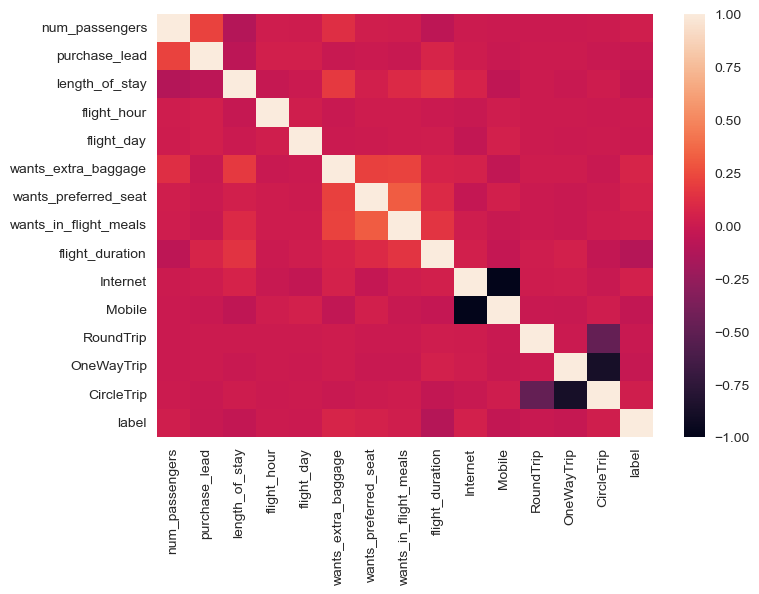

In [347]:
sns.heatmap(cor)

# train test split

In [350]:
df_final.dtypes

num_passengers             int64
purchase_lead              int64
length_of_stay             int64
flight_hour                int64
flight_day                 int64
wants_extra_baggage        int64
wants_preferred_seat       int64
wants_in_flight_meals      int64
flight_duration          float64
Internet                 float64
Mobile                   float64
RoundTrip                float64
OneWayTrip               float64
CircleTrip               float64
label                      int64
dtype: object

In [1004]:
scaled_df=df_final

In [1006]:
from sklearn.model_selection import train_test_split
X=scaled_df.iloc[:,:-1] # all rows and other than last column
y=scaled_df['label']
X

num_passengers  purchase_lead  length_of_stay  flight_hour  flight_day  \
0                   2            262              19            7           6   
1                   1            112              20            3           6   
2                   2            243              22           17           3   
3                   1             96              31            4           6   
4                   2             68              22           15           3   
...               ...            ...             ...          ...         ...   
49995               2             27               6            9           6   
49996               1            111               6            4           7   
49997               1             24               6           22           6   
49998               1             15               6           11           1   
49999               1             19               6           10           4   

       wants_extra_baggage  wants_preferred_seat  wants_in_flight_meals  \
0                        1                     0                      0   
1                        0                     0                      0   
2                        1                     1                      0   
3                        0                     0                      1   
4                        1                     0                      1   
...                    ...                   ...                    ...   
49995                    1                     0                      1   
49996                    0                     0                      0   
49997                    0                     0                      1   
49998                    1                     0                      1   
49999                    0                     1                      0   

       flight_duration  Internet  Mobile  RoundTrip  OneWayTrip  CircleTrip  
0                 5.52       1.0     0.0        0.0         0.0         1.0  
1                 5.52       1.0     0.0        0.0         0.0         1.0  
2                 5.52       1.0     0.0        0.0         0.0         1.0  
3                 5.52       1.0     0.0        0.0         0.0         1.0  
4                 5.52       1.0     0.0        0.0         0.0         1.0  
...                ...       ...     ...        ...         ...         ...  
49995             5.62       1.0     0.0        0.0         0.0         1.0  
49996             5.62       1.0     0.0        0.0         0.0         1.0  
49997             5.62       1.0     0.0        0.0         0.0         1.0  
49998             5.62       1.0     0.0        0.0         0.0         1.0  
49999             5.62       1.0     0.0        0.0         0.0         1.0  

[49992 rows x 14 columns]

In [1008]:
X_train,X_test,y_train,y_test=train_test_split(X.to_numpy(),y.to_numpy(),test_size=0.20,random_state=1)

# NOW ONLY THEY NORMALIZED ONLY X

In [1011]:
scaler=StandardScaler().fit(X_train)
scaler=StandardScaler().fit(X_test)

In [1013]:
scaler.transform(X_train)
scaler.transform(X_test)

array([[-0.58017645, -0.93474589, -0.61677799, ..., -0.04695819,
        -0.08923962,  0.10101525],
       [ 0.41215751, -0.11179723,  1.68623401, ..., -0.04695819,
        -0.08923962,  0.10101525],
       [-0.58017645, -0.34222286,  0.41351685, ..., -0.04695819,
        -0.08923962,  0.10101525],
       ...,
       [ 0.41215751,  0.0747378 , -0.52586962, ..., -0.04695819,
        -0.08923962,  0.10101525],
       [-0.58017645, -0.69334761, -0.61677799, ..., -0.04695819,
        -0.08923962,  0.10101525],
       [-0.58017645,  0.0308472 ,  0.38321406, ..., -0.04695819,
        -0.08923962,  0.10101525]])

In [1015]:
X_train.shape

(39993, 14)

In [1017]:
X_test.shape

(9999, 14)

# Model

In [1020]:
!pip install yellowbrick

In [1021]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score # total true/total
from sklearn.metrics import f1_score #combinaton
from sklearn.metrics import precision_score #truep/total positive(tp+fp)
from sklearn.metrics import recall_score # truep/tpositive+falsenegative

from sklearn.inspection import permutation_importance

from yellowbrick.classifier import ConfusionMatrix
from sklearn.model_selection import GridSearchCV,RepeatedStratifiedKFold

In [1022]:
def model_fit(model,x,y,xpredict):
    model.fit(x,y)
    return model.predict(xpredict)


In [1023]:
def accur(ytrue,ypred):
    return accuracy_score(ytrue,ypred)

In [1024]:
def preci(ytrue,ypred):
    return precision_score(ytrue,ypred)

In [1025]:
def f1(ytrue,ypred):
    return f1_score(ytrue,ypred)

In [1026]:
def recal(ytrue,ypred):
    return recall_score(ytrue,ypred)

# RANDOM FOREST CLASSIFIER

In [1248]:
rfc=RandomForestClassifier(n_estimators=50,max_depth=50,min_samples_split=5,random_state=0)

# checking training accuracy

In [1251]:
ypretrain=model_fit(rfc,X_train,y_train,X_train)
set(ypretrain)

{0, 1}

In [1252]:
f1=round(f1(y_train,ypretrain),2)
f1

0.98

In [1255]:
accur=round(accur(y_train,ypretrain),2)

In [1257]:
accur

0.98

In [1259]:
preci=round(preci(y_train,ypretrain),2)
preci

0.98

In [1261]:
recal=round(recal(y_train,ypretrain),2)
recal

0.97

0.9761712439418416

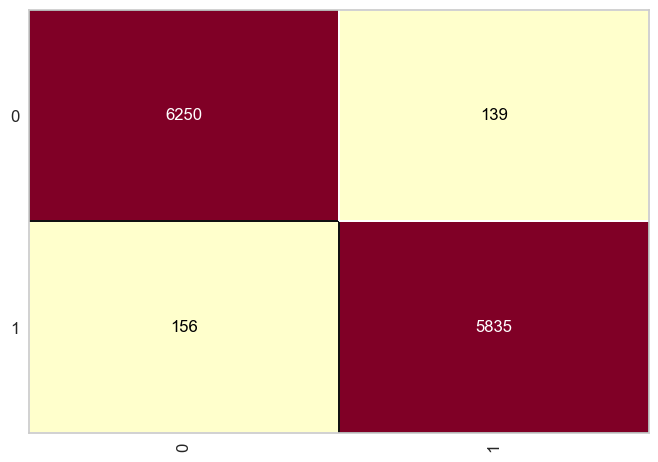

In [1263]:
cm=ConfusionMatrix(rfc,classes=[0,1])
cm.fit(X_train,y_train)
cm.score(X_train,y_train)

0.6253229974160207

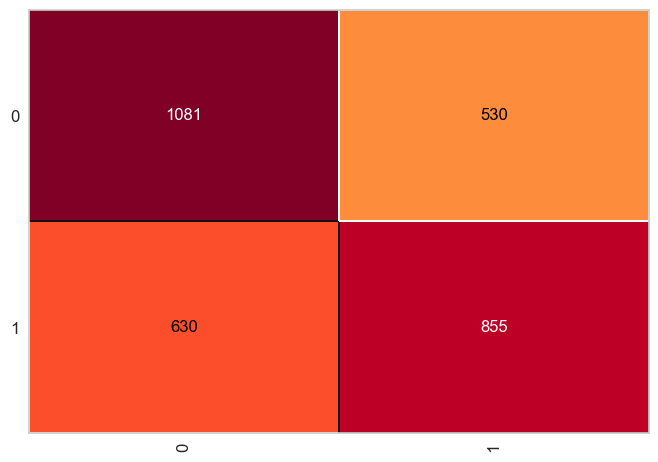

In [1265]:
cm=ConfusionMatrix(rfc,classes=[0,1])
cm.fit(X_train,y_train)
cm.score(X_test,y_test)

# checking testing accuracy

In [1268]:
ypretest=model_fit(rfc,X_train,y_train,X_test)
set(ypretest)

{0, 1}

In [1269]:
def f1(ytrue,ypred):
    return f1_score(ytrue,ypred)
f1(y_test,ypretest)

0.5958188153310104

In [1272]:
def accur(ytrue,ypred):
    return accuracy_score(ytrue,ypred)
accur=round(accur(y_test,ypretest),2)
accur

0.63

In [1274]:
def recal(ytrue,ypred):
    return recall_score(ytrue,ypred)
recal=round(recal(y_test,ypretest),2)
recal

0.58

In [1276]:
def preci(ytrue,ypred):
    return precision_score(ytrue,ypred)
preci=round(preci(y_test,ypretest),2)
preci

0.62

0.6253229974160207

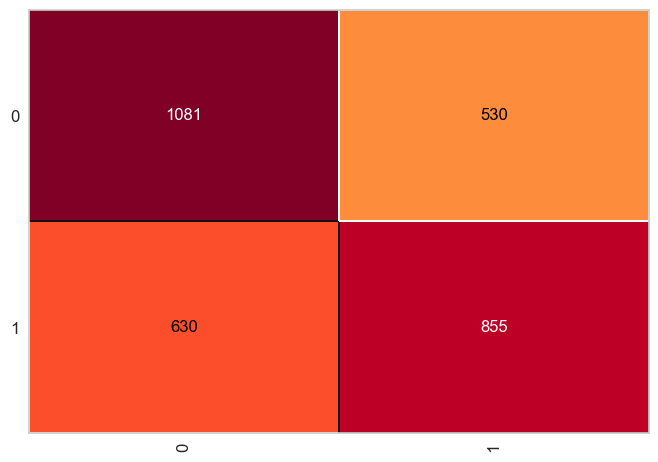

In [1278]:
cm=ConfusionMatrix(rfc,classes=[0,1])
cm.fit(X_train,y_train)
cm.score(X_test,y_test)

In [1280]:
tp=62
tn=8472
fn=1399
fp=66

In [1282]:
acc=(tp+tn)/(tp+tn+fn+fp)
acc

0.8534853485348535

In [1284]:
pre=tp/tp+fp
pre

67.0

In [1286]:
rec=tp/(tp+fn)
rec

0.04243668720054757

Text(0.5, 0, 'RANDOM FOREST CLASSIFIER FEATURE IMPORTANCES')

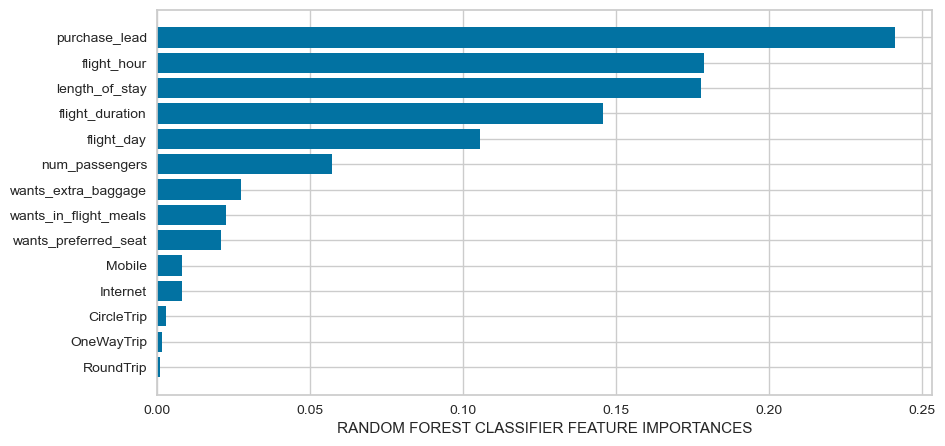

In [1183]:
plt.figure(figsize=(10,5))
sorted_idx=rfc.feature_importances_.argsort()
plt.barh(scaled_df.iloc[:,:-1].columns[sorted_idx],rfc.feature_importances_[sorted_idx])
plt.xlabel('RANDOM FOREST CLASSIFIER FEATURE IMPORTANCES')

In [1185]:
# first 4 or 5 features only contributing the output prediction 

Text(0.5, 0, 'rfc')

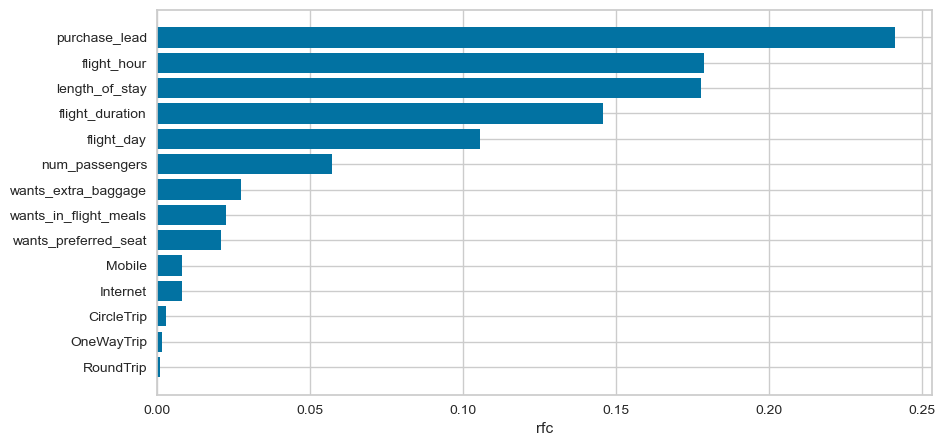

In [1187]:
plt.figure(figsize=(10,5))
sorted_idx=rfc.feature_importances_.argsort()
plt.barh(scaled_df.iloc[:,:-1].columns[sorted_idx],rfc.feature_importances_[sorted_idx])
plt.xlabel('rfc')

In [1189]:
#it is imbalanced dataset we are getting f1 score is low because we have 0 classes in high enteries so we reduced the 0 entries to equal or near to 1 entries

# balancing data set

In [1192]:
scaled_df.label.value_counts()

label
0    42516
1     7476
Name: count, dtype: int64

In [1194]:
scaled_df_0=scaled_df[scaled_df.label==0].sample(n=8000)

In [1196]:
scaled_df_new=pd.concat([scaled_df[scaled_df.label==1],scaled_df_0],ignore_index=True)

In [1198]:
scaled_df_new=scaled_df_new.sample(frac=1).reset_index(drop=True)

In [1200]:
scaled_df_new.label.value_counts()

label
0    8000
1    7476
Name: count, dtype: int64

In [1202]:
scaled_df_new.shape

(15476, 15)

In [1204]:
scaled_df_new

num_passengers  purchase_lead  length_of_stay  flight_hour  flight_day  \
0                   1             12              21           22           3   
1                   1             13              43            4           2   
2                   1              5               6            1           1   
3                   3             18              66            9           4   
4                   4             15               5           15           4   
...               ...            ...             ...          ...         ...   
15471               1             60               2            1           7   
15472               1             11               6            6           2   
15473               1             37              28            8           3   
15474               1              9               5            3           6   
15475               1             16              25            1           6   

       wants_extra_baggage  wants_preferred_seat  wants_in_flight_meals  \
0                        1                     0                      0   
1                        1                     0                      0   
2                        0                     0                      0   
3                        1                     0                      1   
4                        0                     0                      0   
...                    ...                   ...                    ...   
15471                    0                     0                      0   
15472                    1                     1                      1   
15473                    1                     0                      0   
15474                    0                     0                      0   
15475                    1                     0                      0   

       flight_duration  Internet  Mobile  RoundTrip  OneWayTrip  CircleTrip  \
0                 8.58       1.0     0.0        0.0         0.0         1.0   
1                 8.58       1.0     0.0        0.0         0.0         1.0   
2                 8.67       1.0     0.0        0.0         0.0         1.0   
3                 4.75       1.0     0.0        0.0         0.0         1.0   
4                 5.13       0.0     1.0        0.0         0.0         1.0   
...                ...       ...     ...        ...         ...         ...   
15471             7.57       0.0     1.0        0.0         0.0         1.0   
15472             6.42       0.0     1.0        0.0         0.0         1.0   
15473             8.58       1.0     0.0        0.0         0.0         1.0   
15474             4.67       0.0     1.0        0.0         0.0         1.0   
15475             4.75       1.0     0.0        0.0         0.0         1.0   

       label  
0          1  
1          0  
2          0  
3          1  
4          0  
...      ...  
15471      0  
15472      0  
15473      0  
15474      0  
15475      0  

[15476 rows x 15 columns]

In [1206]:
from sklearn.model_selection import train_test_split
X=scaled_df_new.iloc[:,:-1] # all rows and other than last column
y=scaled_df_new['label']
y

0        1
1        0
2        0
3        1
4        0
        ..
15471    0
15472    0
15473    0
15474    0
15475    0
Name: label, Length: 15476, dtype: int64

In [1208]:
X_train,X_test,y_train,y_test=train_test_split(X.to_numpy(),y.to_numpy(),test_size=0.20,random_state=1)
X_test.shape

(3096, 14)

In [1210]:
scaler=StandardScaler().fit(X_train)
scaler=StandardScaler().fit(X_test)

In [1212]:
scaler.transform(X_train)
scaler.transform(X_test)

array([[ 0.34664711, -0.39417281, -0.5577528 , ..., -0.02542464,
        -0.08063467,  0.08459787],
       [ 0.34664711, -0.4619448 , -0.58983877, ..., -0.02542464,
        -0.08063467,  0.08459787],
       [ 1.27988142,  1.58251036, -0.5577528 , ..., -0.02542464,
        -0.08063467,  0.08459787],
       ...,
       [-0.5865872 , -0.14567549, -0.52566683, ..., -0.02542464,
        -0.08063467,  0.08459787],
       [ 0.34664711, -0.34899148, -0.52566683, ..., -0.02542464,
        -0.08063467,  0.08459787],
       [-0.5865872 , -0.32640081, -0.58983877, ..., -0.02542464,
        -0.08063467,  0.08459787]])

# training

In [1215]:
pretrain=model_fit(rfc,X_train,y_train,X_train)
set(pretrain)

{0, 1}

0.9761712439418416

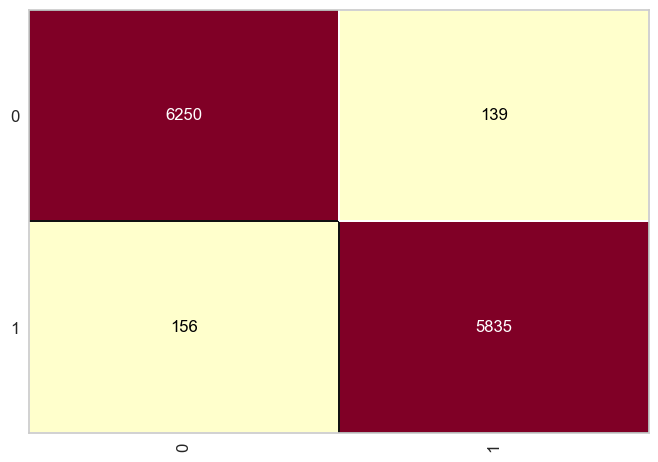

In [1216]:
cm=ConfusionMatrix(rfc,classes=[0,1])
cm.fit(X_train,y_train)
cm.score(X_train,y_train)  #training prediction

In [1218]:
def recal(ytrue,ypred):
    return recall_score(ytrue,ypred)
recal(y_train,pretrain)

0.9739609414121182

In [1221]:
def preci(ytrue,ypred):
    return precision_score(ytrue,ypred)
preci(y_train,pretrain)

0.9767325075326414

In [1223]:
def f1(ytrue,ypred):
    return f1_score(ytrue,ypred)
f1(y_train,pretrain)

0.9753447555369829

In [1225]:
def accur(ytrue,ypred):
    return accuracy_score(ytrue,ypred)
accur(y_train,pretrain)

0.9761712439418416

# testing

In [1228]:
pretest=model_fit(rfc,X_train,y_train,X_test)
set(pretest)

{0, 1}

0.6253229974160207

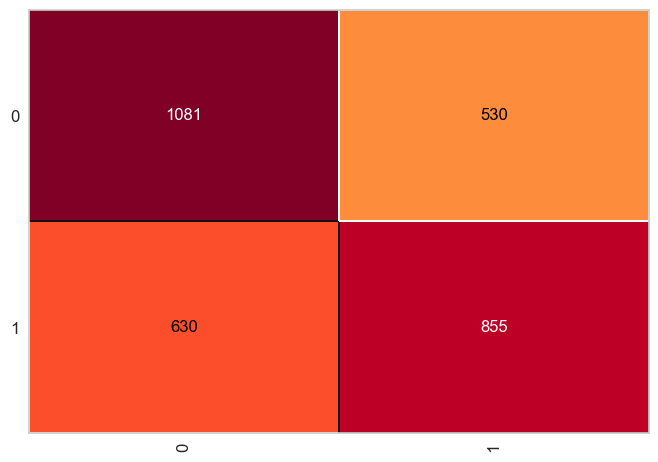

In [1230]:
cm=ConfusionMatrix(rfc,classes=[0,1])
cm.fit(X_train,y_train)
cm.score(X_test,y_test)  #testing prediction

In [1232]:
def accur(ytrue,ypred):
    return accuracy_score(ytrue,ypred)
accur(y_test,pretest)

0.6253229974160207

In [1234]:
def preci(ytrue,ypred):
    return precision_score(ytrue,ypred)
accur(y_test,pretest)

0.6253229974160207

In [1236]:
def f1(ytrue,ypred):
    return f1_score(ytrue,ypred)
f1(y_test,pretest)

0.5958188153310104

In [1238]:
def recal(ytrue,ypred):
    return recall_score(ytrue,ypred)
recal(y_test,pretest)

0.5757575757575758

# specificity ?

Text(0.5, 0, 'RANDOM FOREST CLASSIFIER FEATURES IMPORTANCE')

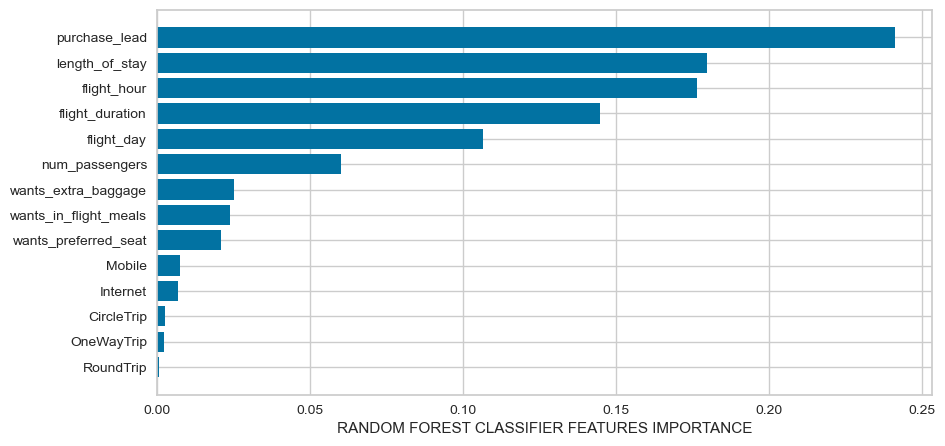

In [1241]:
plt.figure(figsize=(10,5))
sort=rfc.feature_importances_.argsort()
plt.barh(scaled_df_new.iloc[:,:-1].columns[sort],rfc.feature_importances_[sort])
plt.xlabel("RANDOM FOREST CLASSIFIER FEATURES IMPORTANCE")

Text(0.5, 0, 'rfc')

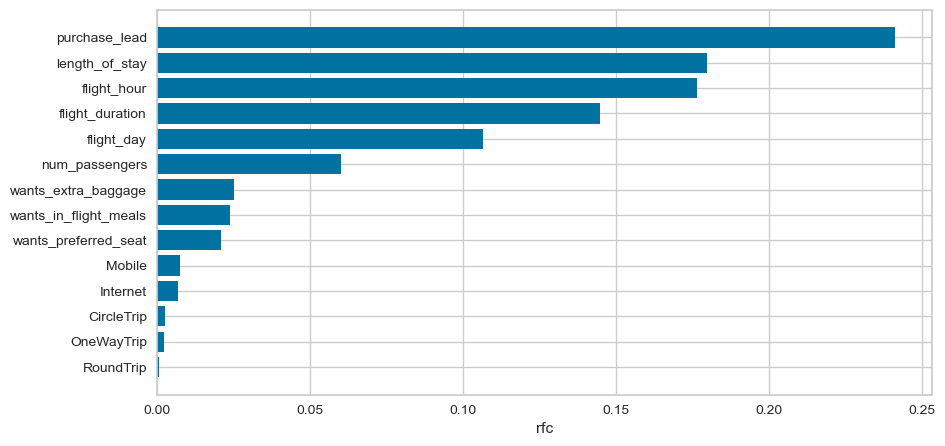

In [1243]:
plt.figure(figsize=(10,5))
sorted_idx=rfc.feature_importances_.argsort()
plt.barh(scaled_df.iloc[:,:-1].columns[sorted_idx],rfc.feature_importances_[sorted_idx])
plt.xlabel('rfc')

In [1246]:
# higher recall score and higher true positive model would be good